In [1]:
import sklearn
from sklearn import datasets
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import datasets
import matplotlib.pyplot as plt
from PIL import Image
import cv2

<h1><center><font color="teale">Assignment 4: Classifiers </font></center></h1>

In [2]:
#Open Dataset
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

## 1 Dataset Overview

b'batch_label'
b'labels'
b'data'
b'filenames'


<IPython.core.display.Javascript object>


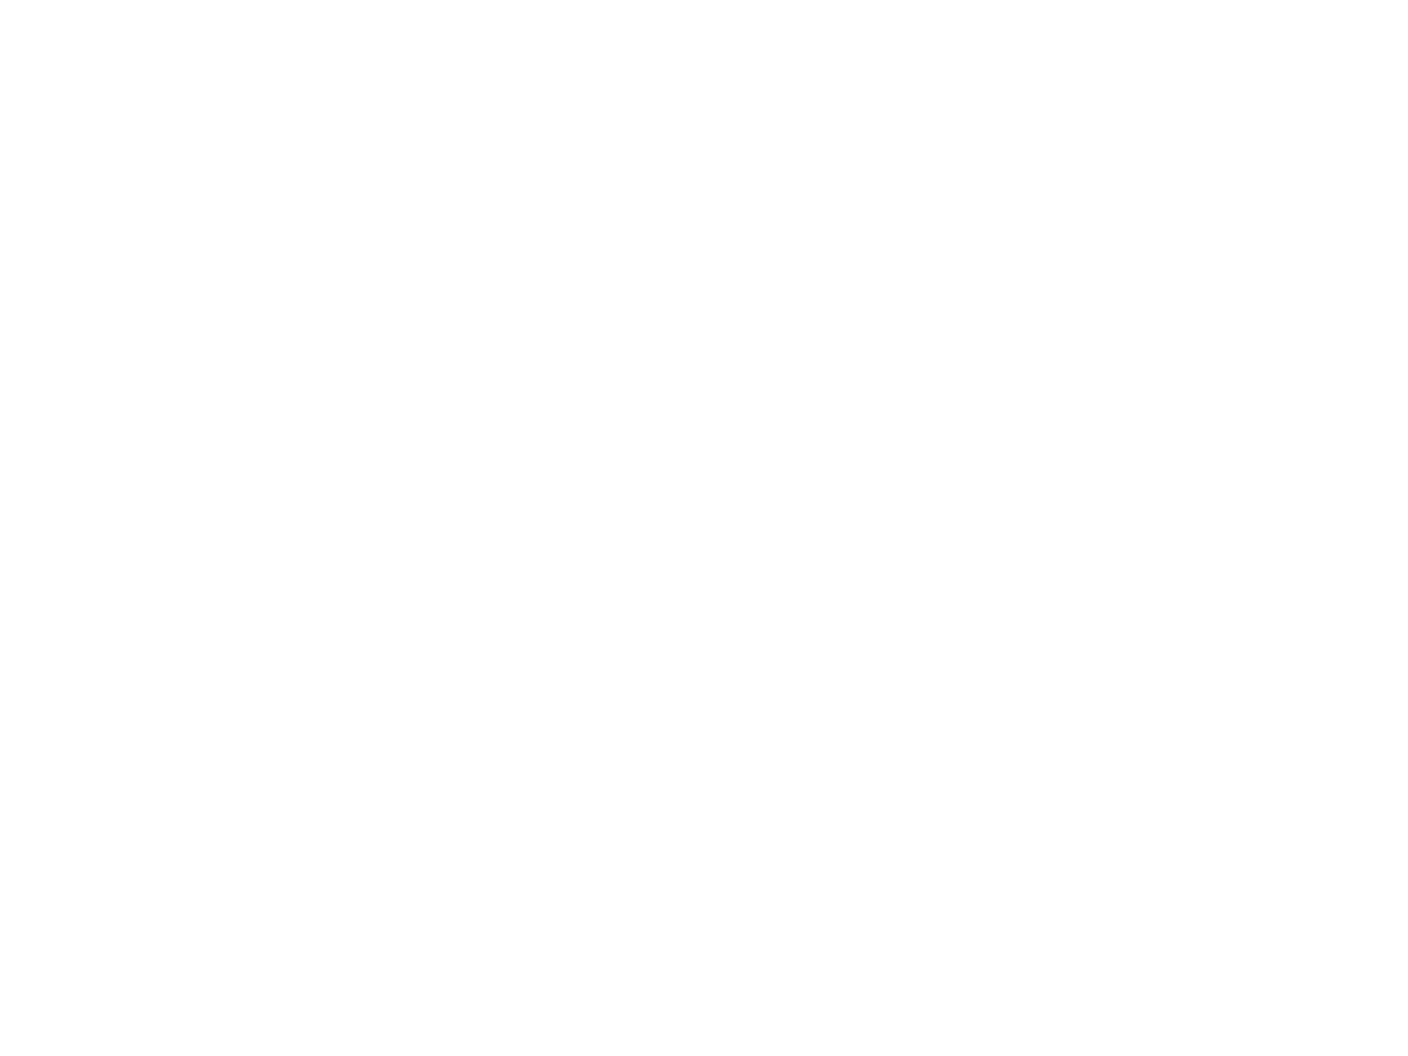

<IPython.core.display.Javascript object>


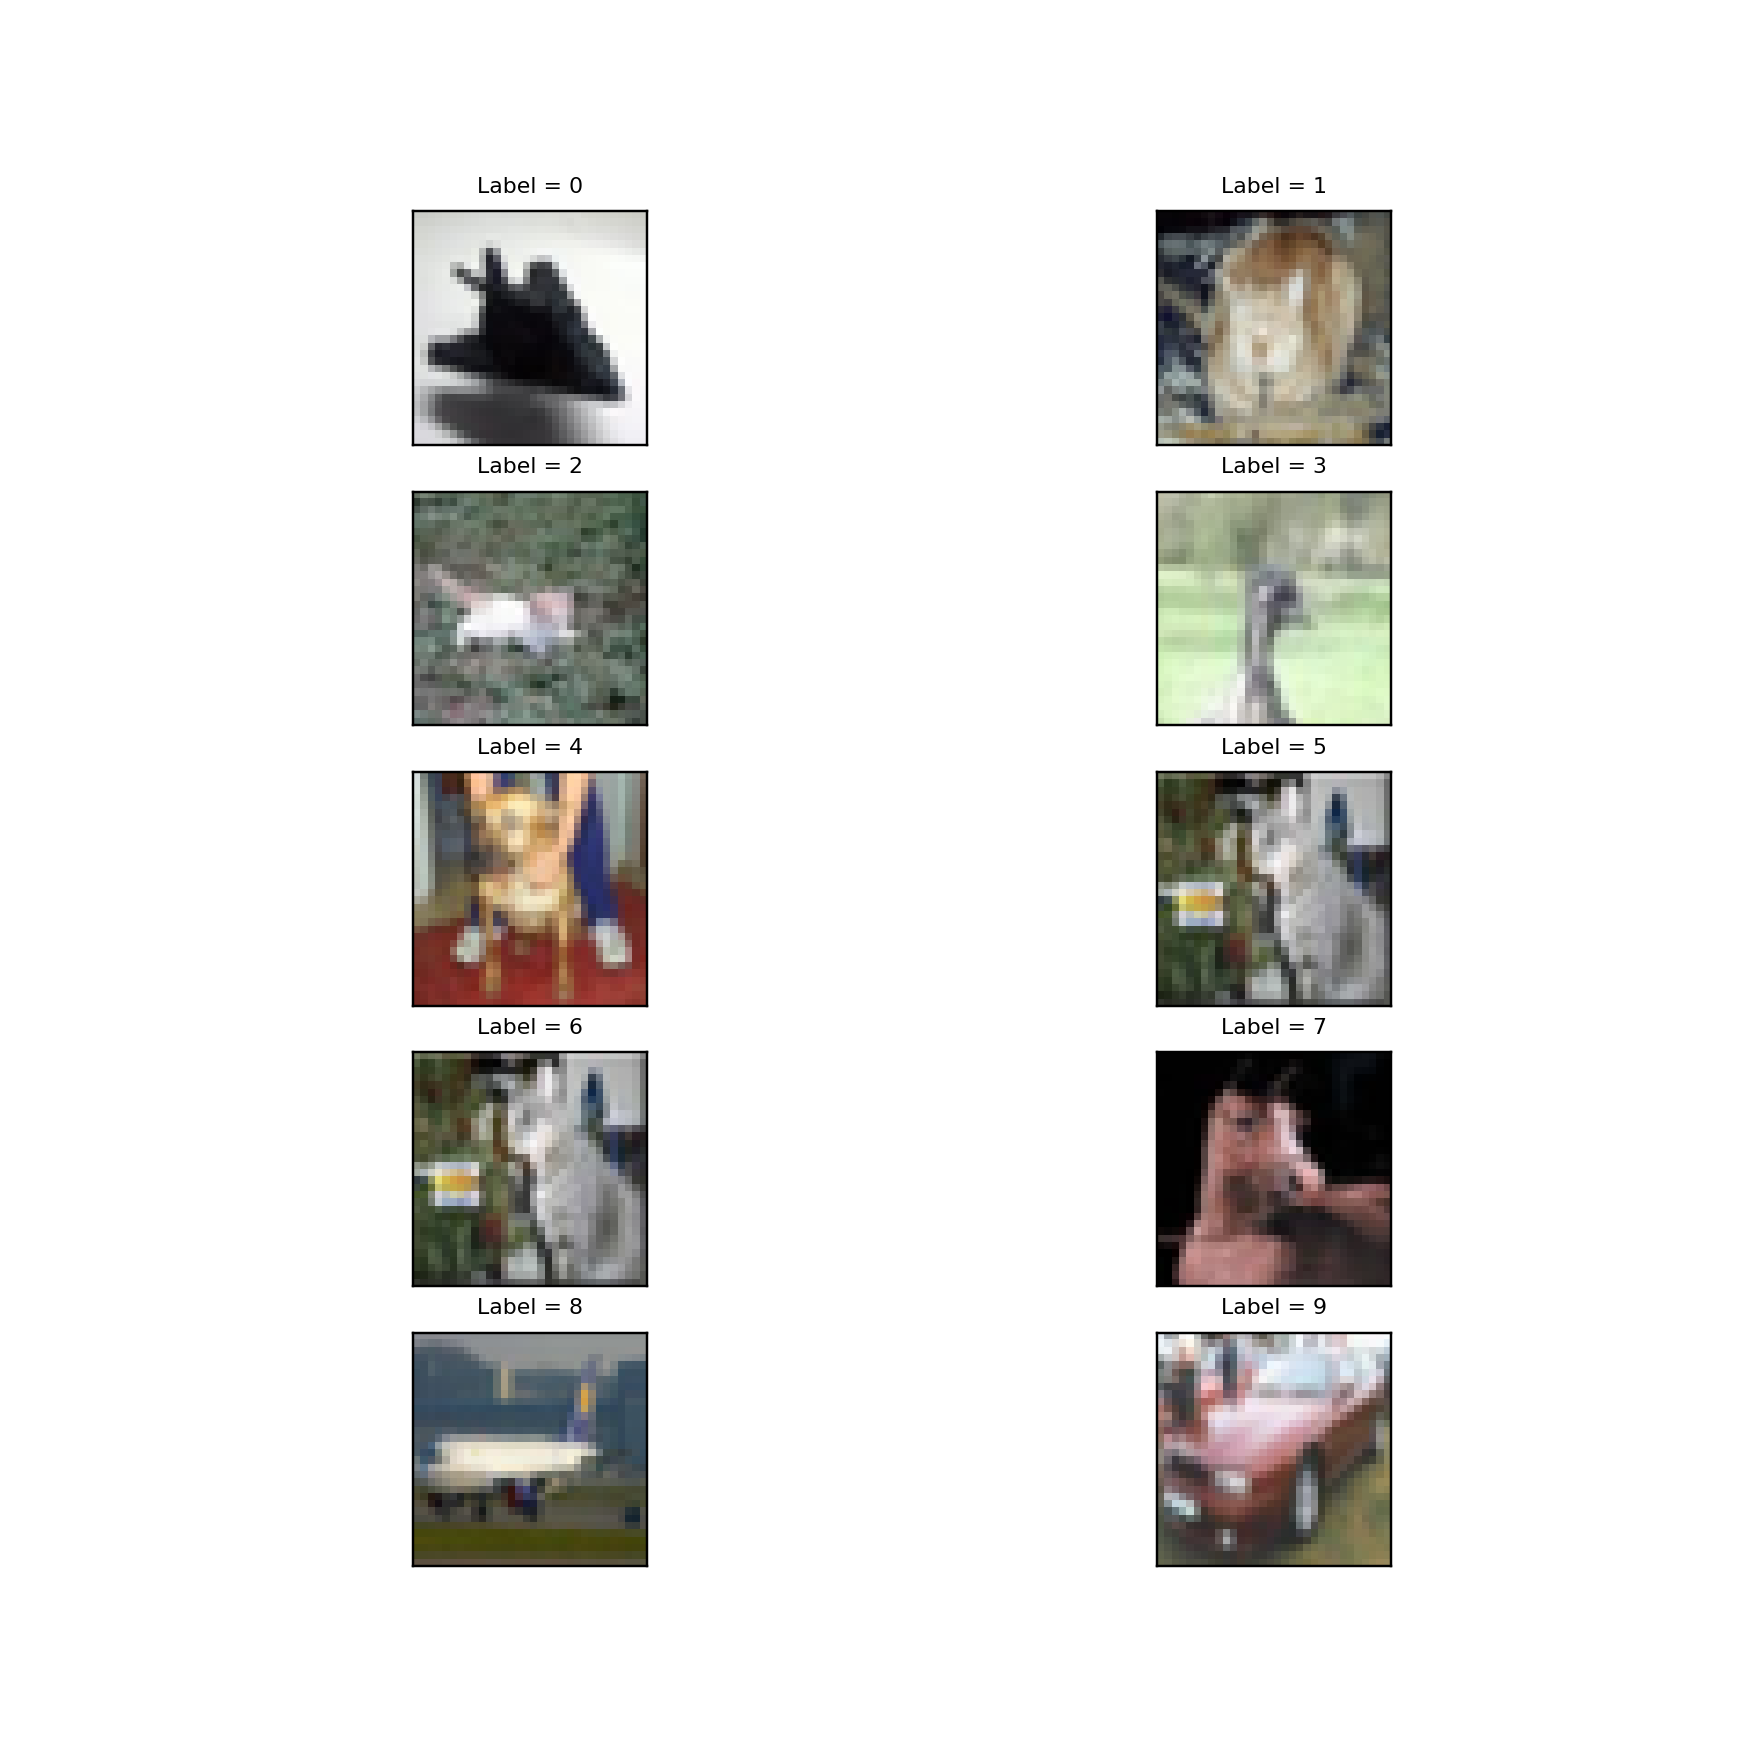

10000


In [3]:
dicti=unpickle("data_batch_1")

for key in dicti.keys():
    print (key)
    if key.decode("utf-8")==("data"):
        res=dicti[key]
    if key.decode("utf-8")==("labels"):
        labels=dicti[key]
        
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 6}

plt.rc('font', **font)
plt.subplots_adjust(hspace = 3.5)
plt.figure(figsize=(8,8))

#print (res)
print (len(labels))
#print (labels)
data = res.reshape(-1,3,32,32).transpose([0,2,3,1])
index=0


for i in range (0,10):
    for x in labels:
        if (i==x):    
            plt.subplot(5,2,(i+1)), plt.imshow(data[index])
            plt.title('Label = '+str(x)), plt.xticks([]), plt.yticks([])
            break;
        index+=1

plt.show()



## 2 SVMs

In [110]:
#Import the Support Vector Machine classifier:
from sklearn import svm
from skimage import color
from skimage.feature import hog
# We'll be using the confusion matrix:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


svm_classifer = svm.SVC(gamma='scale', kernel='linear')

# classification dataset with 3 classes
dicti=unpickle("data_batch_1")

for key in dicti.keys():
    print (key)
    if key.decode("utf-8")==("data"):
        X=dicti[key]
    if key.decode("utf-8")==("labels"):
        Y=dicti[key]
#print(len(Y))
data = X.reshape(-1,3,32,32).transpose([0,2,3,1])
data_gray = [ color.rgb2gray(i) for i in data]
#HOG
ppc = 8
#hog_image2 = []
hog_features = []
for image in data_gray:
    fd,_ = hog(image, orientations=9, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2', visualize=True)
    #hog_image2.append(hog_image)
    hog_features.append(fd)
    
X_HOG=np.array(hog_features)


b'batch_label'
b'labels'
b'data'
b'filenames'


### 2.1 Linear SVMs - Exploring Features/ HoG

(10000, 324)
(7000, 324)
(3000, 324)


<IPython.core.display.Javascript object>


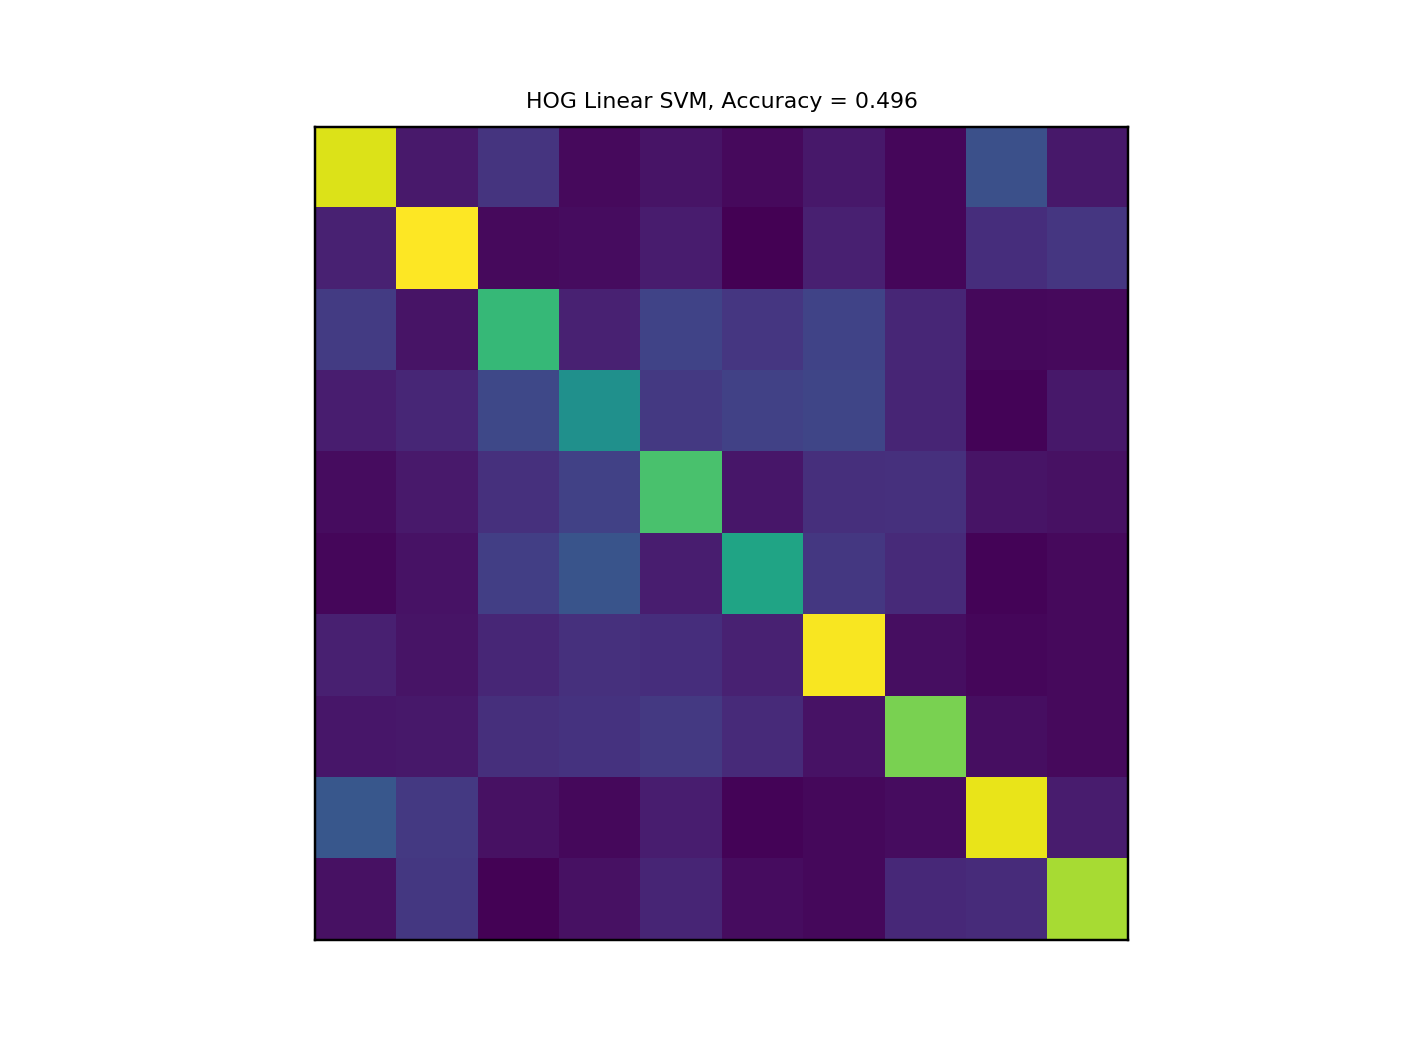

In [111]:
# Split the data
X_trainHOG, X_testHOG, Y_trainHOG, Y_testHOG = train_test_split( X_HOG, Y, train_size=0.7)
print(X_HOG.shape)
print(X_trainHOG.shape)
print(X_testHOG.shape)

# Train the SVM classifier:
svm_classifer.fit(X_trainHOG, Y_trainHOG)
#X:training values
#Y:target values

# Get the predictions of the classifier:
prediction = svm_classifer.predict(X_testHOG)


# Create the confusion matrix using the function:
confSVM = confusion_matrix(Y_testHOG, prediction)

accuracySVM = accuracy_score(Y_testHOG, prediction)


# We can plot images using pyplot.imshow( ???)
plt.figure()
plt.title('HOG Linear SVM, Accuracy = '+str("{0:.3f}".format(round(accuracySVM,3)))), plt.xticks([]), plt.yticks([])
plt.imshow(confSVM)


### 2.1 Linear SVMs - Exploring Features/ Color

In [72]:
X_COLOR = np.mean(data, axis=3)
X_COLOR=np.mean(X_COLOR, axis=1)
X_trainCOLOR, X_testCOLOR, Y_trainCOLOR, Y_testCOLOR = train_test_split( X_COLOR, Y, train_size=0.7)
print(X_COLOR.shape)
print(X_trainCOLOR.shape)
print(X_testCOLOR.shape)


(10000, 32)
(7000, 32)
(3000, 32)


<IPython.core.display.Javascript object>


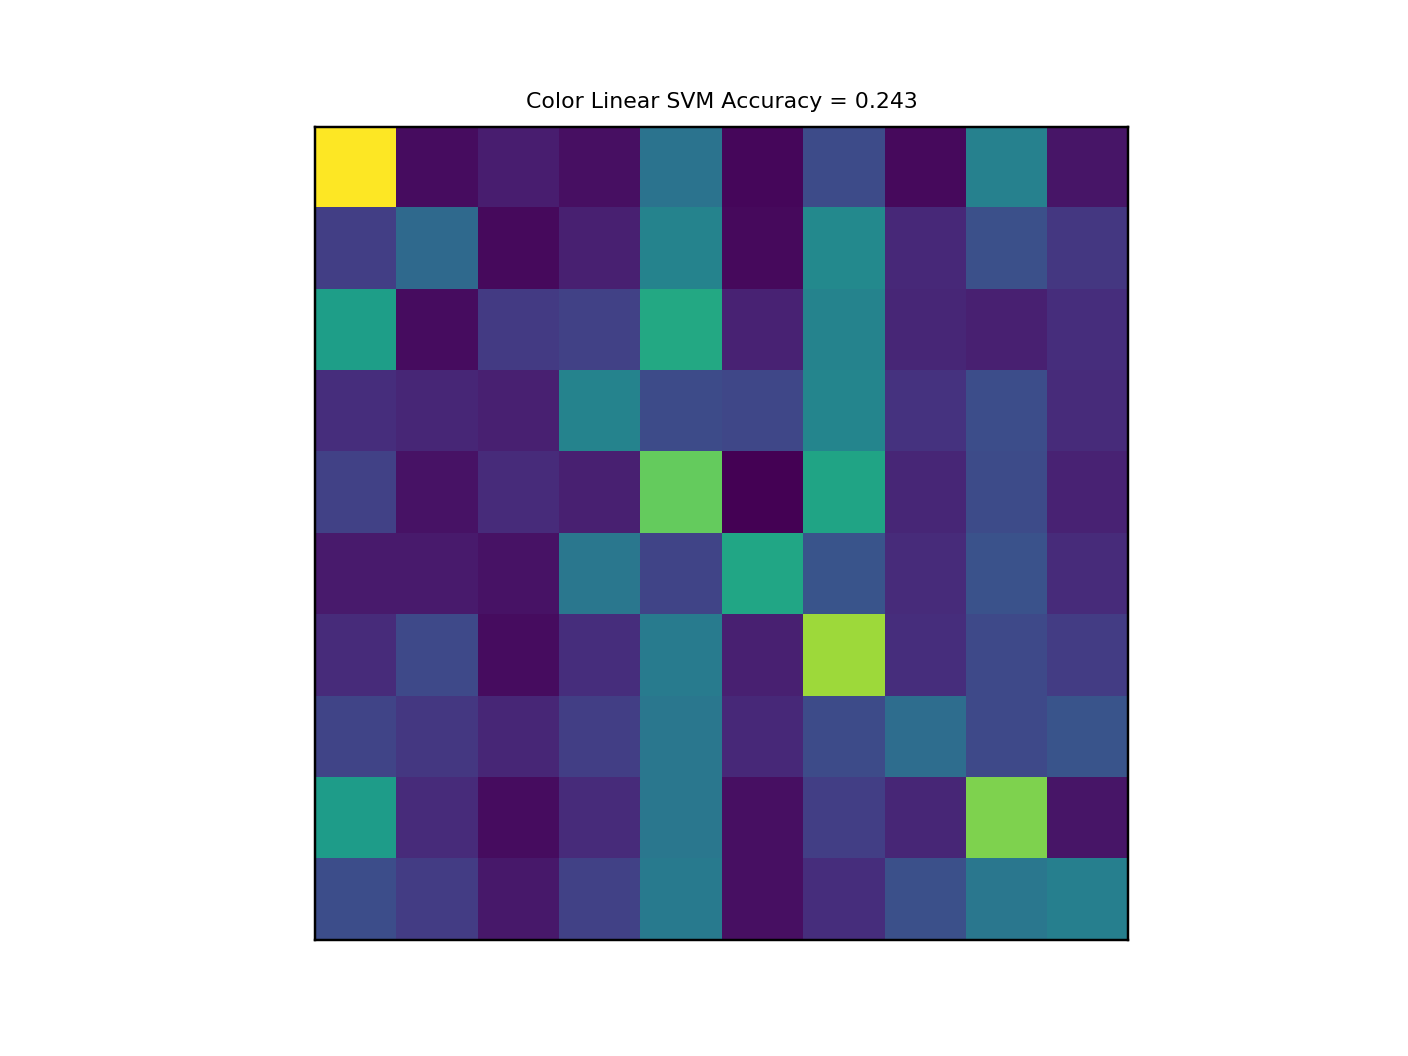

In [74]:
svm_classiferCOLOR = svm.SVC(gamma='scale')
# Train the SVM classifier:
svm_classiferCOLOR.fit(X_trainCOLOR, Y_trainCOLOR)
#X:training values
#Y:target values

# Get the predictions of the classifier:
predictionCOLOR = svm_classiferCOLOR.predict( X_testCOLOR )


# Create the confusion matrix using the function:
confCOLOR = confusion_matrix(Y_testCOLOR, predictionCOLOR)
accuracyCOLOR = accuracy_score(Y_testCOLOR, predictionCOLOR)


# We can plot images using pyplot.imshow( ???)
plt.figure()
plt.title('Color Linear SVM Accuracy = '+str("{0:.3f}".format(round(accuracyCOLOR,3)))), plt.xticks([]), plt.yticks([])
plt.imshow(confCOLOR)


HoG is a better feature when it comes to feature matching in terms of performance metrics. <br>
For this particular case it is expected, since the color pictures present different metrics than HoG and have different intensities, we are more likely to incorrectly match images. <br>
If we had a dataset with grayscale images we would have similar results for both features.

### 2.2 Non-linear SVMs - Exploring SVM Kernels

In [6]:
# Split the data
X_trainNL, X_testNL, Y_trainNL, Y_testNL = train_test_split( X_HOG, Y, train_size=0.7)
print(X_HOG.shape)
print(X_trainNL.shape)
print(X_testNL.shape)

(10000, 324)
(7000, 324)
(3000, 324)


<IPython.core.display.Javascript object>


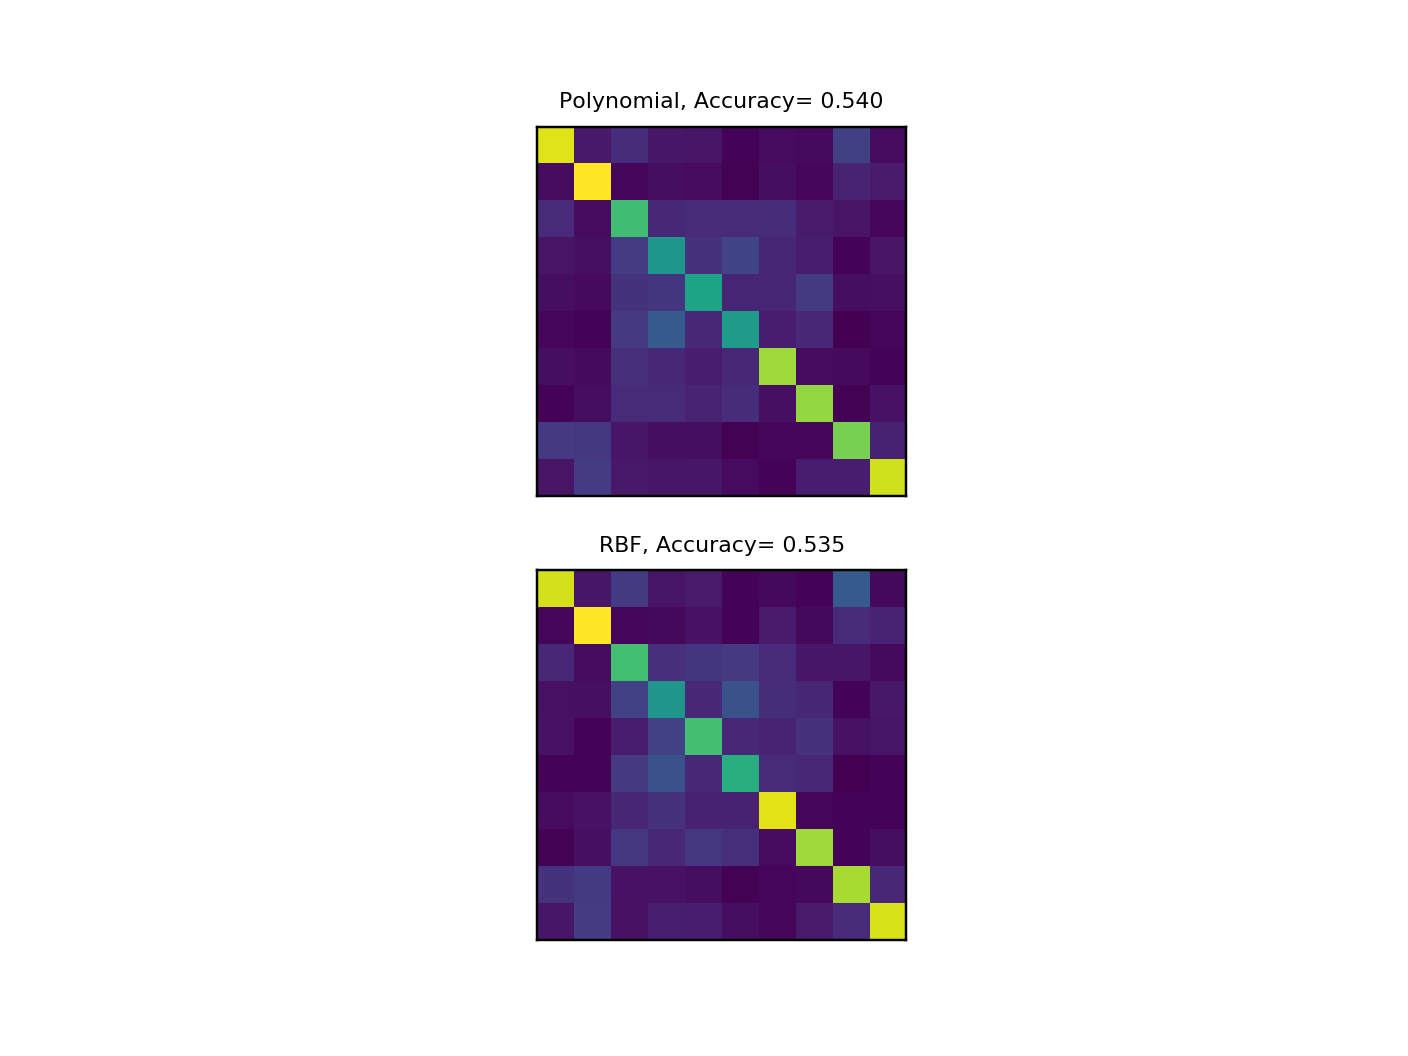

(Text(0.5, 1.0, 'RBF, Accuracy= 0.535'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

In [17]:
# We can change the kernel using the "kernel" parameter
# Different kernels are described in the documentation
# Use kernel='poly' for now
svm_classiferPOLY = svm.SVC( gamma='scale', kernel='poly')
svm_classiferRBF = svm.SVC(gamma='scale', kernel='rbf')
# Fit, predict, and plot the confusion matrix
svm_classiferPOLY.fit(X_trainNL, Y_trainNL)
predictionPOLY = svm_classiferPOLY.predict( X_testNL)
confPOLY = confusion_matrix( Y_testNL, predictionPOLY)
accuracyPOLY = accuracy_score(Y_testNL, predictionPOLY)

svm_classiferRBF.fit(X_trainNL, Y_trainNL)
predictionRBF = svm_classiferRBF.predict( X_testNL)
confRBF = confusion_matrix( Y_testNL, predictionRBF)
accuracyRBF = accuracy_score(Y_testNL, predictionRBF)


# We can plot images using pyplot.imshow( ???)



plt.figure()
plt.subplot(2,1,(1)), plt.imshow(confPOLY)
plt.title('Polynomial, Accuracy= '+str("{0:.3f}".format(round(accuracyPOLY,3)))), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,(2)), plt.imshow(confRBF)
plt.title('RBF, Accuracy= '+str("{0:.3f}".format(round(accuracyRBF,3)))), plt.xticks([]), plt.yticks([])


The Polynomial is giving better results, No this is not expected since the RBF kernel is more popular in SVM classification, and the Polynomial Kernel is more popular in Natural Language Processing. This is likely due to the particular dataset. <br>
The accuracy of these is greater than the Linear SVM HoG, but not by too a great margin. These are more accurate than the Linear SVM with Color channel classifications.

## 3 Random Forest Classifiers

### RF - Exploring Performance of HoG Features

<IPython.core.display.Javascript object>


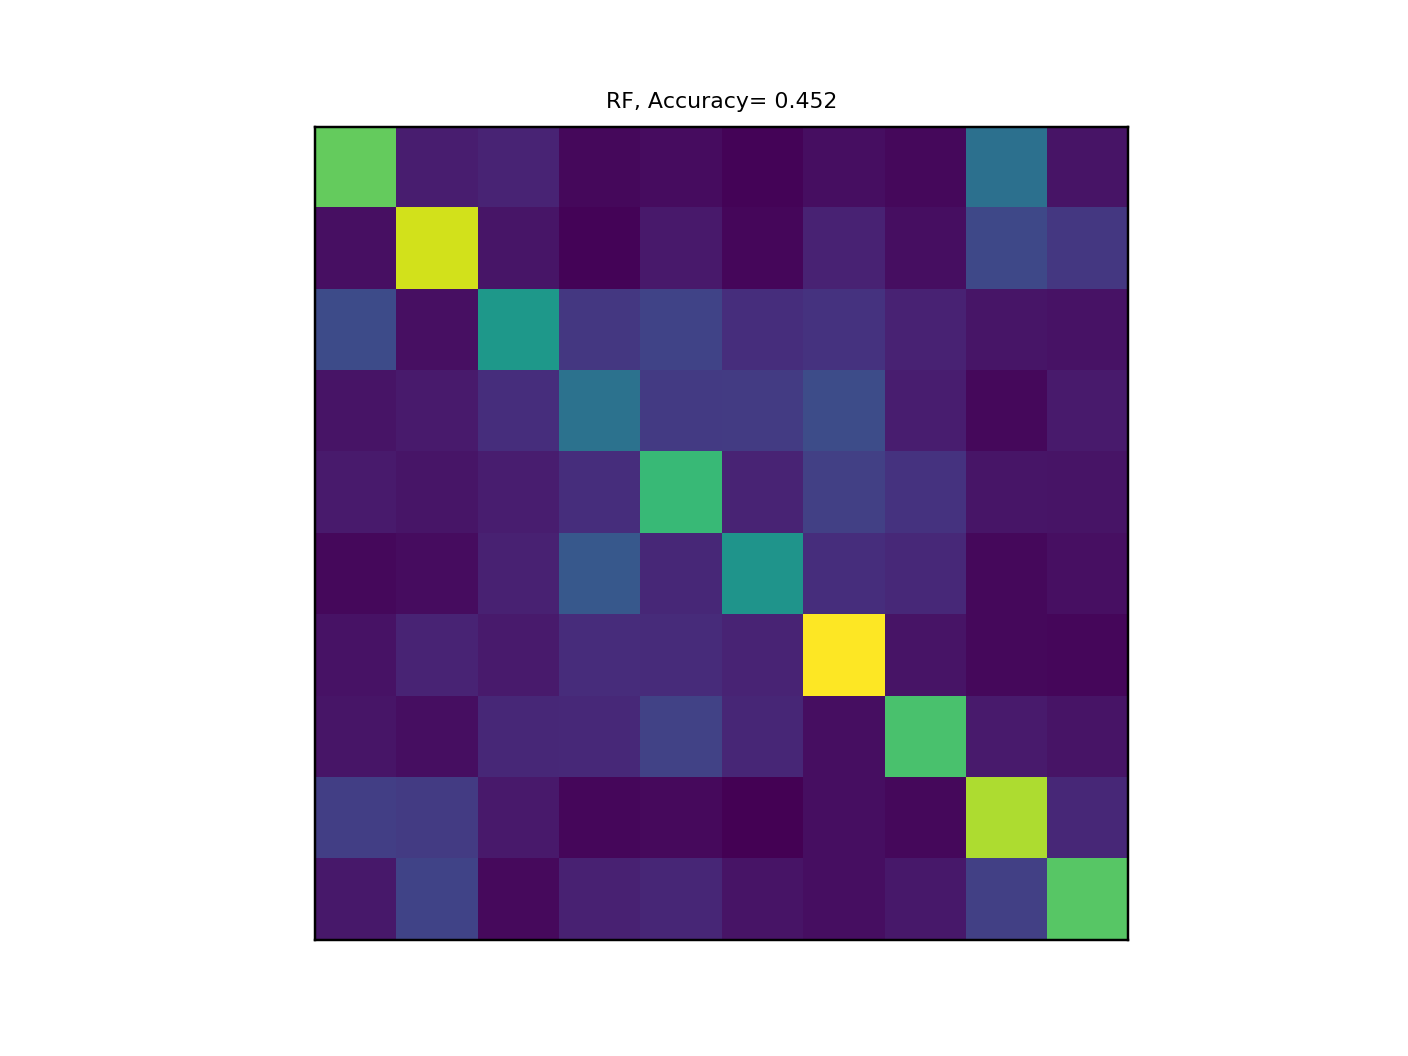

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import matplotlib.pyplot as plt

X_RFC=X_HOG.copy()
Y_RFC=Y.copy()
# training, let's us all the data but the last 4 instances
X_trainRFC, X_testRFC, Y_trainRFC, Y_testRFC = train_test_split( X_RFC, Y_RFC, train_size=0.7)
clf = RandomForestClassifier(n_estimators=100, criterion='entropy')
# Other important arguments:
# min_samples_split : int, float, optional (default=2)
# min_samples_leaf : int, float, optional (default=1)
# max_features : int, float, string or None, optional (default=”auto”)
# max_leaf_nodes : int or None, optional (default=None)

clf.fit(X_trainRFC, Y_trainRFC)
predictionRFC= clf.predict(X_testRFC)
confRFC = confusion_matrix( Y_testRFC, predictionRFC)
accuracyRFC = accuracy_score(Y_testRFC, predictionRFC)


# We can plot images using pyplot.imshow( ???)

plt.figure()
plt.title('RF, Accuracy= '+str("{0:.3f}".format(round(accuracyRFC,3)))), plt.xticks([]), plt.yticks([])
plt.imshow(confRFC)

plt.show()

The performance of this classifier is decent, however it is weaker than the SVM classifiers for HoG, by a significant margin. The accuracy is 0.452, which is lower than the SVM accuracies for HoG.

### 3.2 RF - Exploring Different Number of Trees (estimators)

<IPython.core.display.Javascript object>


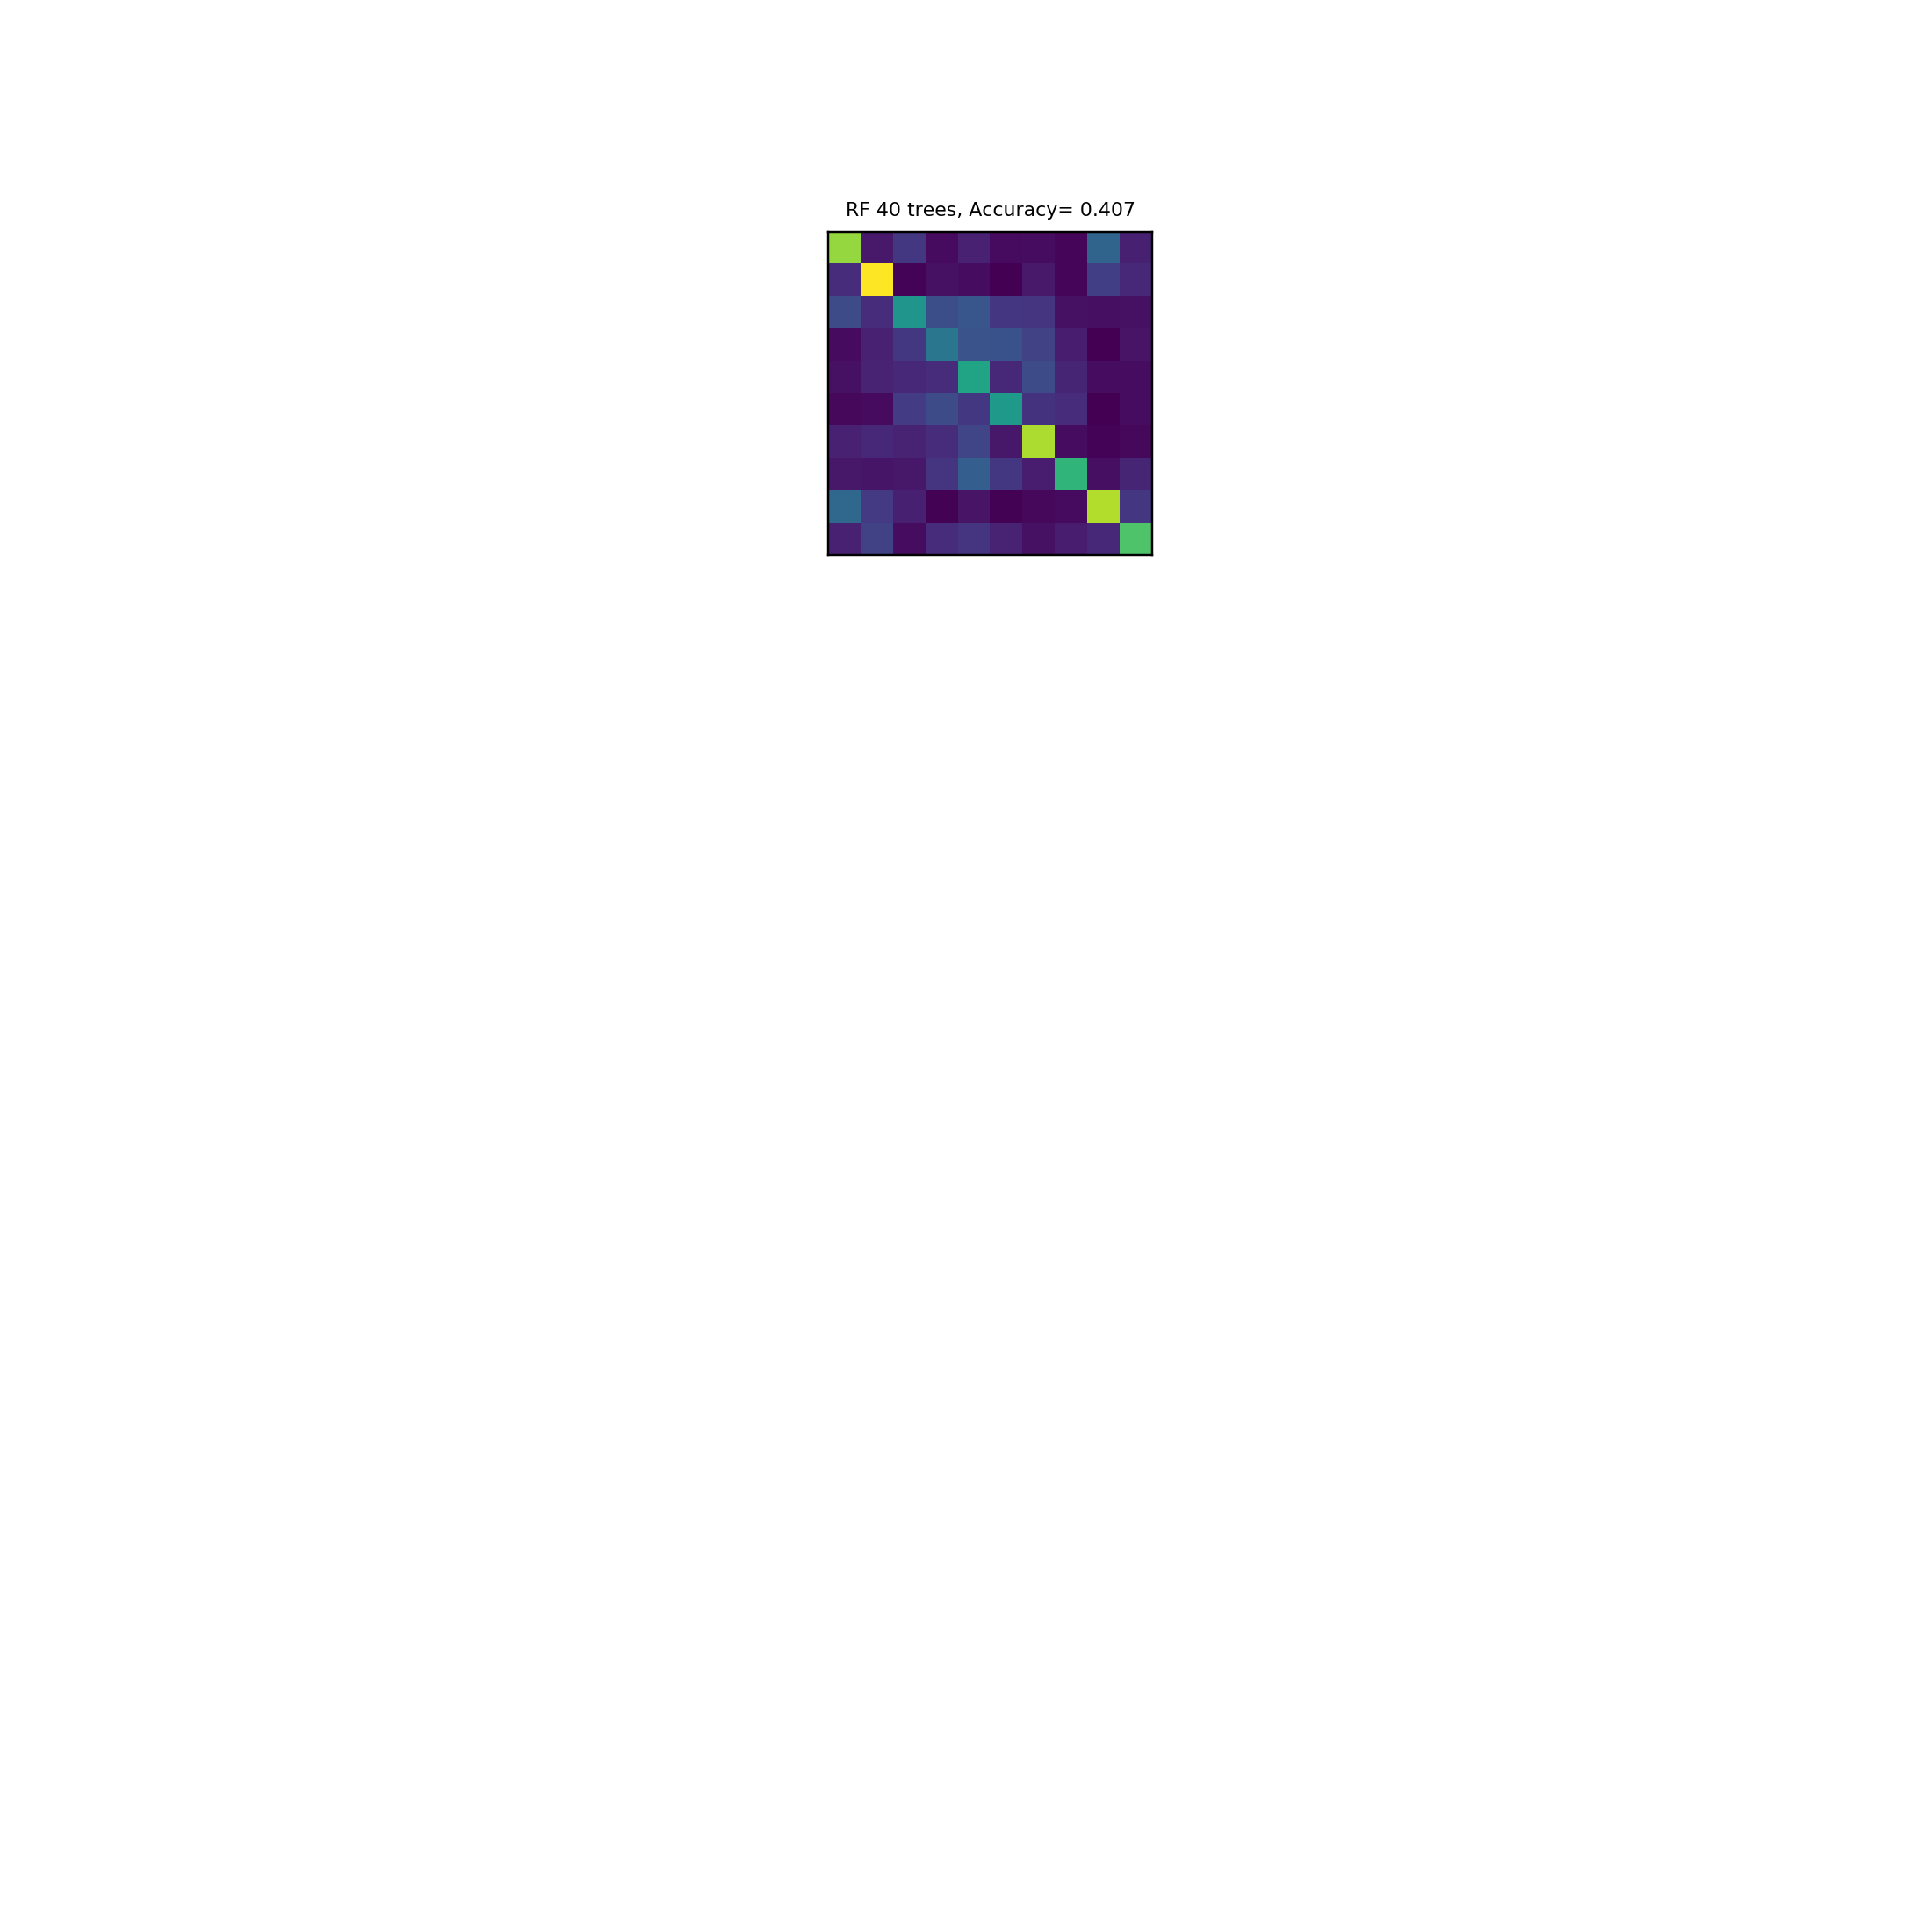

<IPython.core.display.Javascript object>


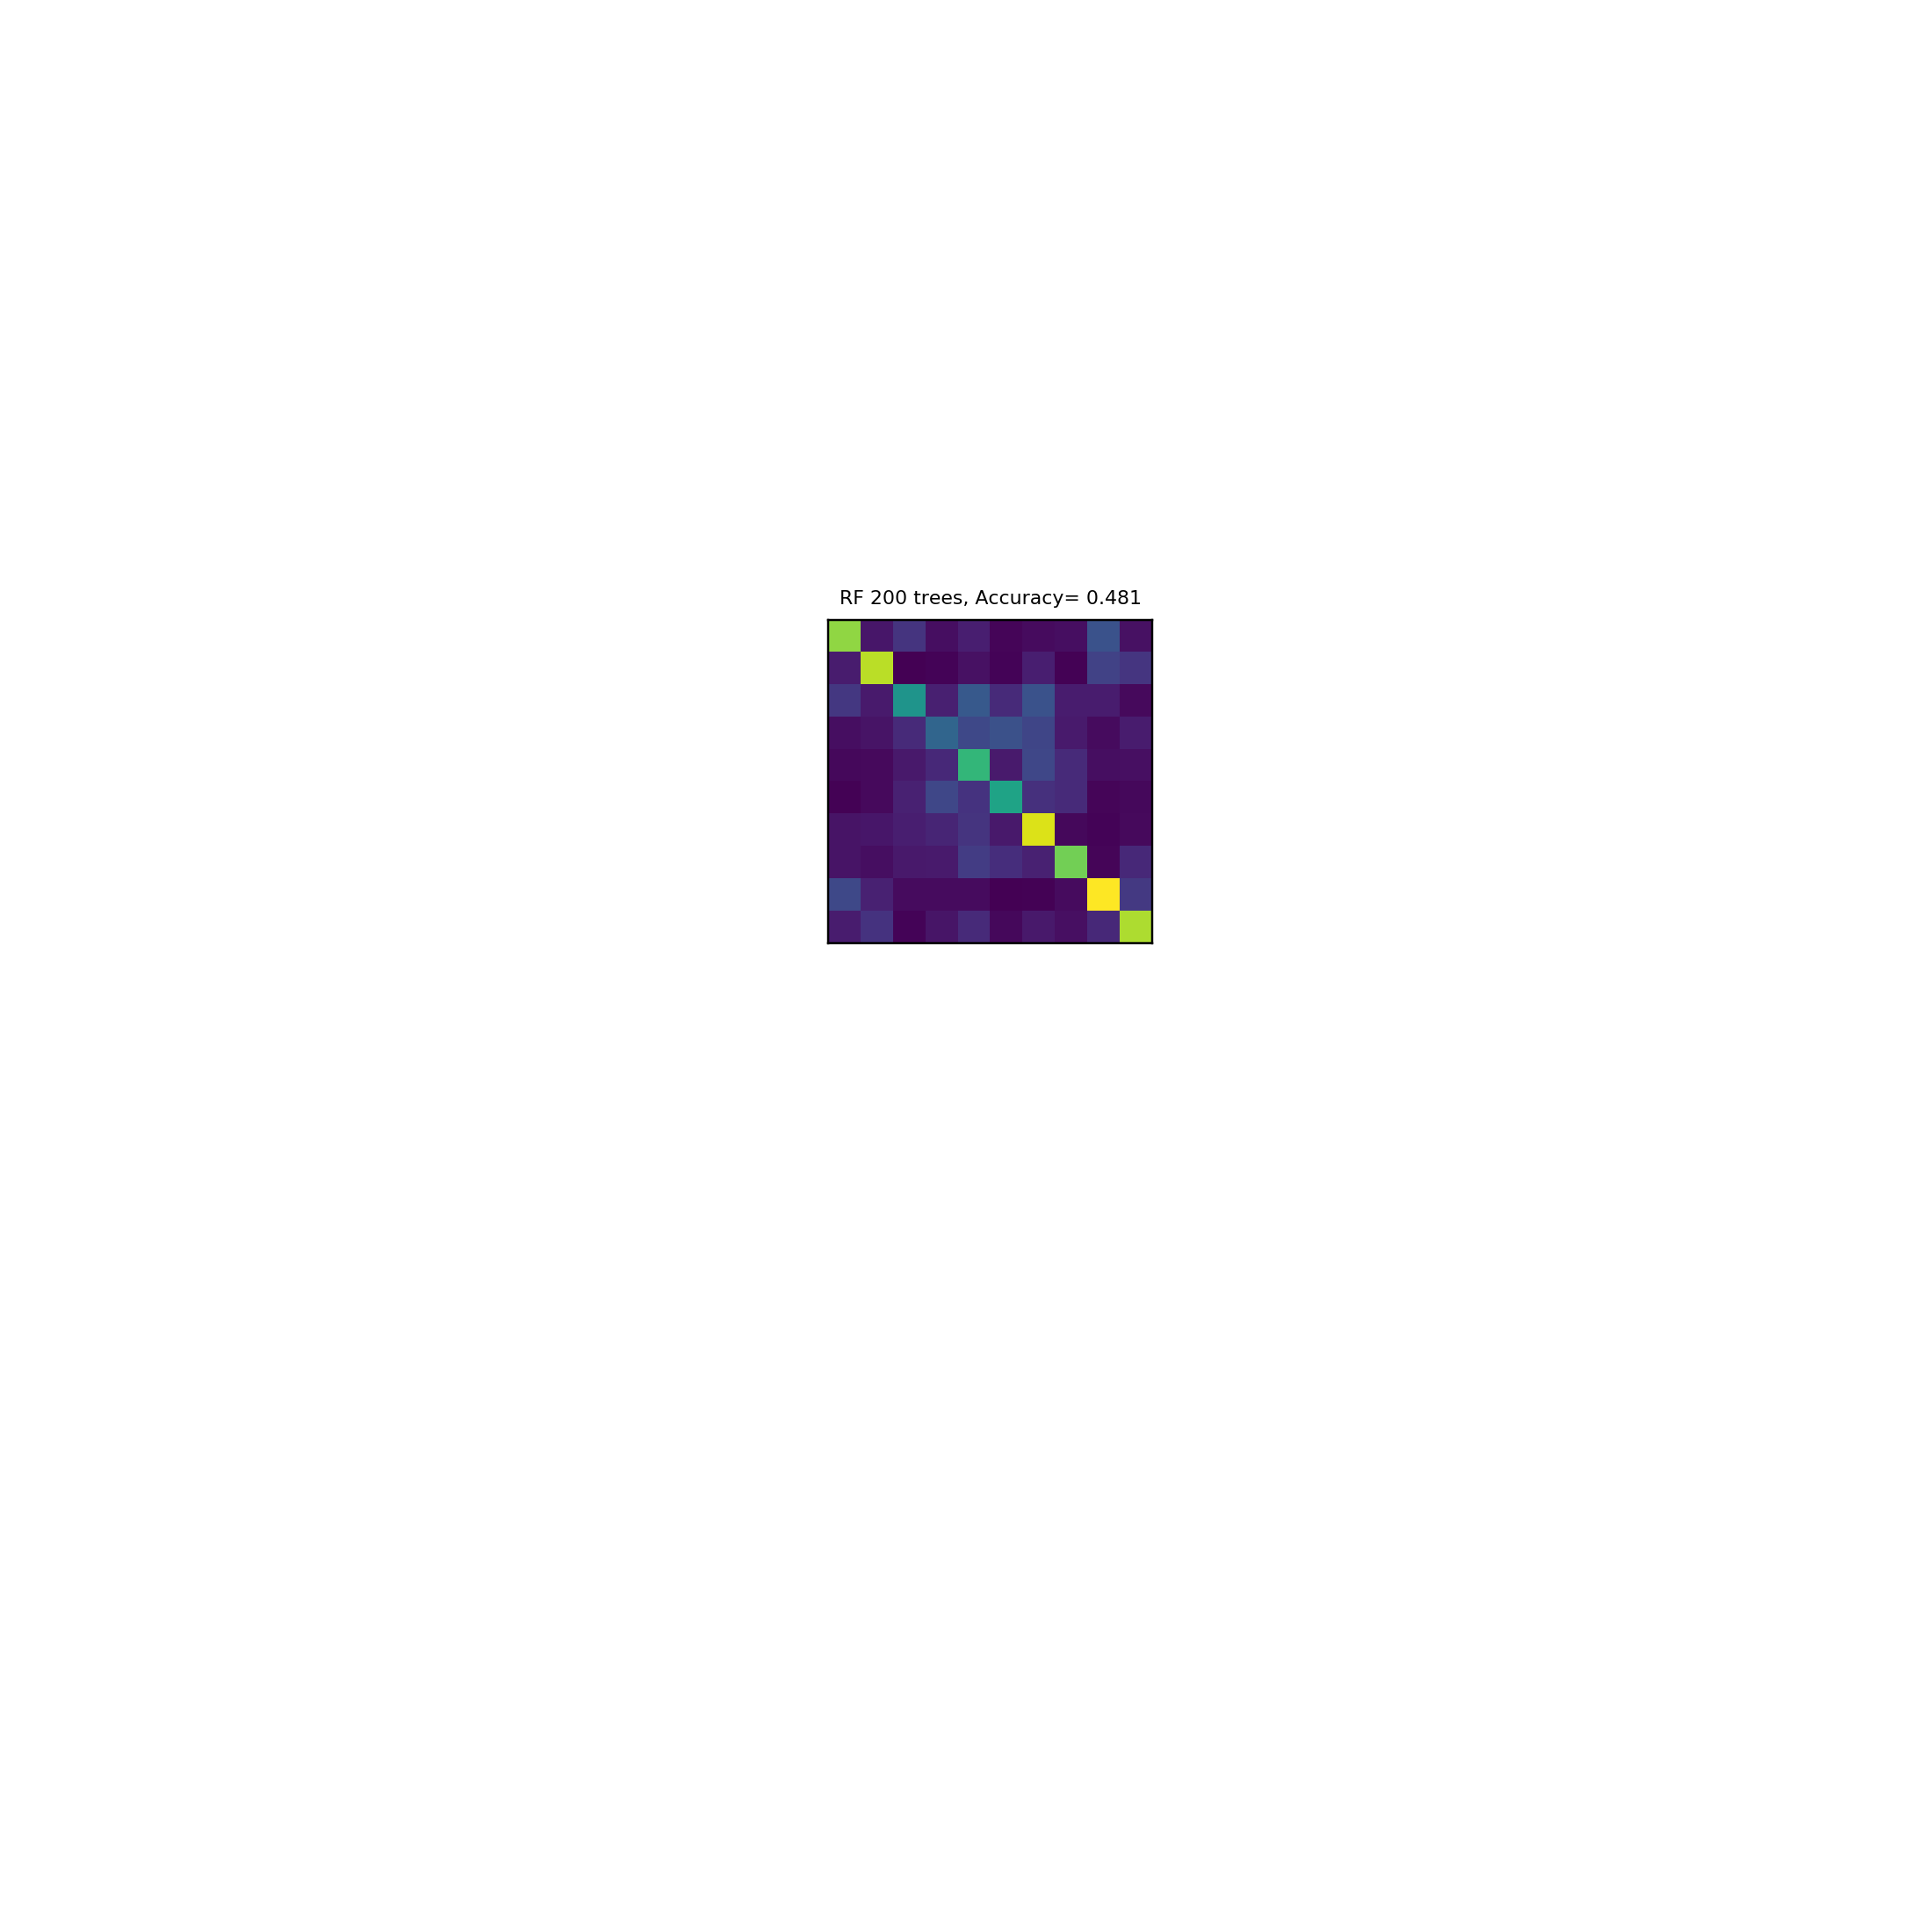

<IPython.core.display.Javascript object>


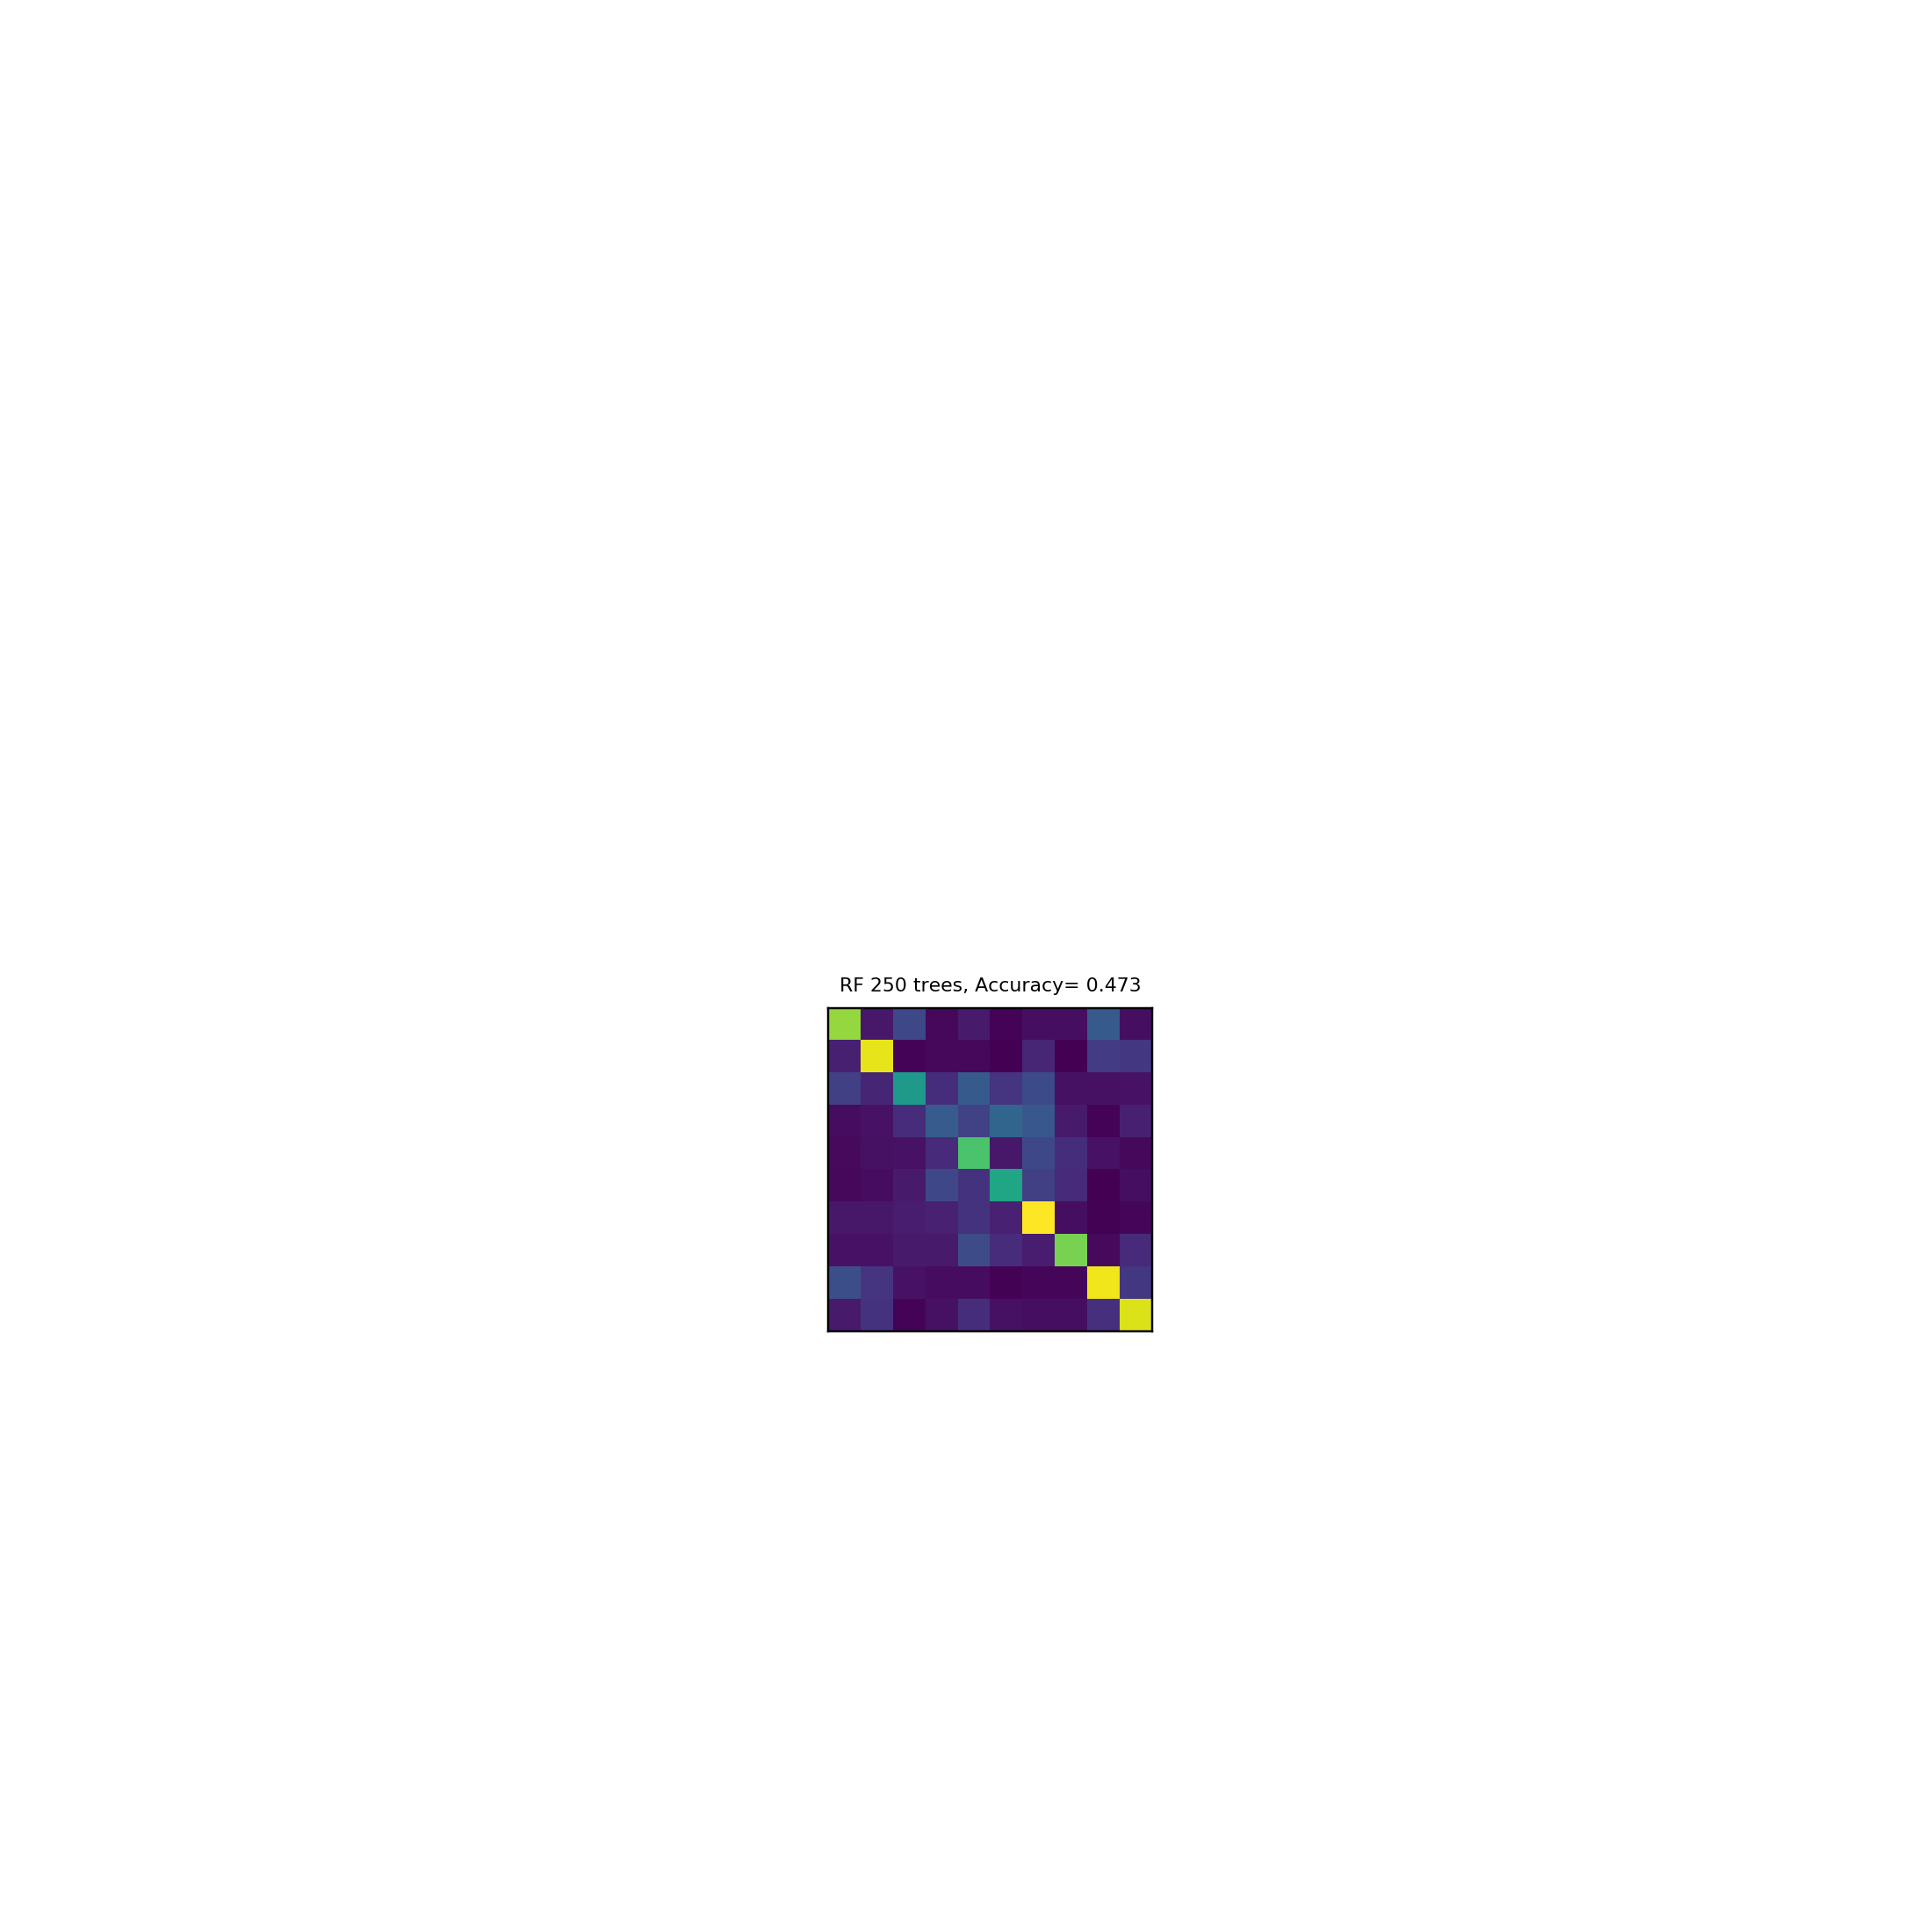

<IPython.core.display.Javascript object>


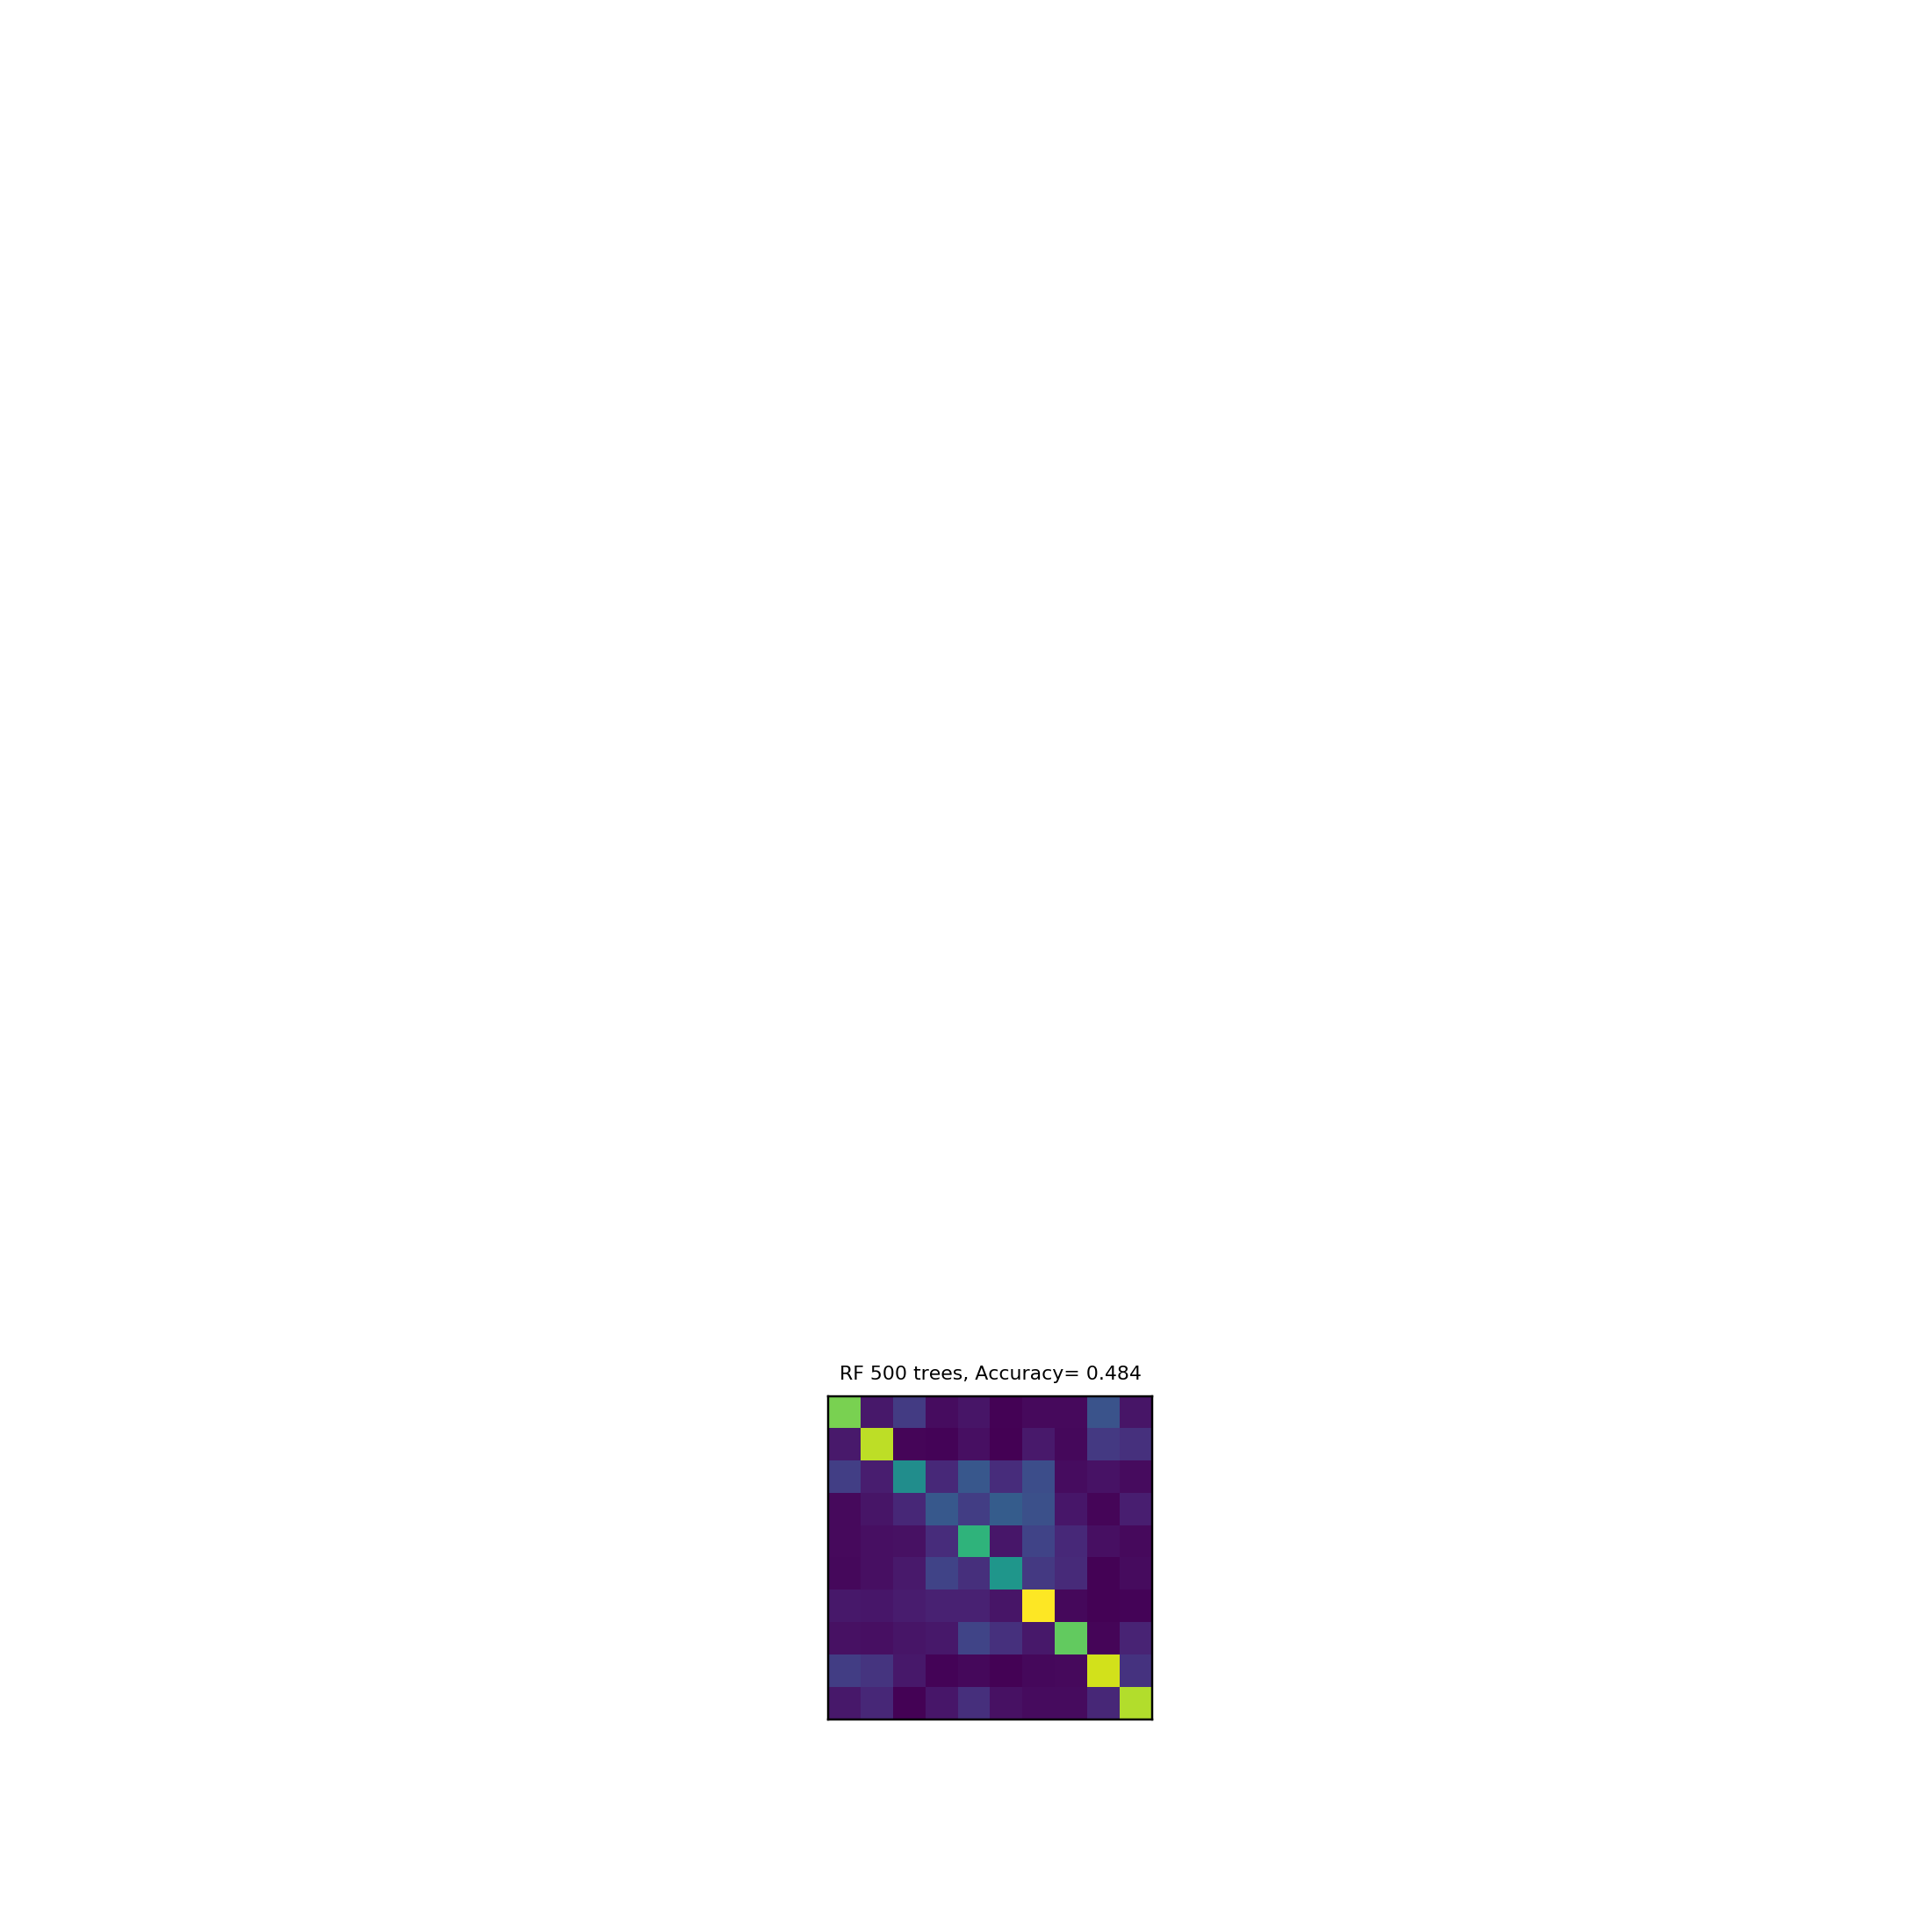

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import matplotlib.pyplot as plt

X_RFCTR=X_HOG.copy()
Y_RFC=Y.copy()
# training, let's us all the data but the last 4 instances
X_trainRFCTR, X_testRFCTR, Y_trainRFCTR, Y_testRFCTR = train_test_split( X_RFCTR, Y_RFC, train_size=0.7)

for i in range (0,4):
    if (i==0):
        tree=40
    elif (i==1):
        tree=200
    elif (i==2):
        tree=250
    else:
        tree=500
    clf = RandomForestClassifier(n_estimators=tree, criterion='entropy')
    clf.fit(X_trainRFCTR, Y_trainRFCTR)
    predictionRFC= clf.predict(X_testRFCTR)
    confRFC = confusion_matrix( Y_testRFCTR, predictionRFC)
    accuracyRFC = accuracy_score(Y_testRFCTR, predictionRFC)
    plt.figure(figsize=(10,10))
    plt.subplot(4,1,(i+1)), plt.imshow(confRFC)
    plt.title('RF '+str(tree)+' trees, Accuracy= '+str("{0:.3f}".format(round(accuracyRFC,3)))), plt.xticks([]), plt.yticks([])

       


plt.show()

The general trend is that as we increase the number of trees, we see an increase in classification performance. However after a certain point it does not make a difference. <br> The optimal optimal performance is with 500 trees, with accuracy 0.484.

## 4 Comparison of Classifiers

### 4.1 Performance Analysis

The best performing classifier in the SVM is the POLY HoG SVM, and 500 trees RF.

In [79]:
#Import the Support Vector Machine classifier:
from sklearn import svm
from skimage import color
from skimage.feature import hog
# We'll be using the confusion matrix:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# classification dataset with 3 classes
dicti=unpickle("data_batch_1")

for key in dicti.keys():
    print (key)
    if key.decode("utf-8")==("data"):
        X=dicti[key]
    if key.decode("utf-8")==("labels"):
        Y=dicti[key]
#print(len(Y))
data = X.reshape(-1,3,32,32).transpose([0,2,3,1])
data_gray = [ color.rgb2gray(i) for i in data]
#HOG
ppc = 8
#hog_image2 = []
hog_features = []
for image in data_gray:
    fd,_ = hog(image, orientations=9, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2', visualize=True)
    #hog_image2.append(hog_image)
    hog_features.append(fd)
    
X_HOG1=np.array(hog_features)



b'batch_label'
b'labels'
b'data'
b'filenames'


<IPython.core.display.Javascript object>


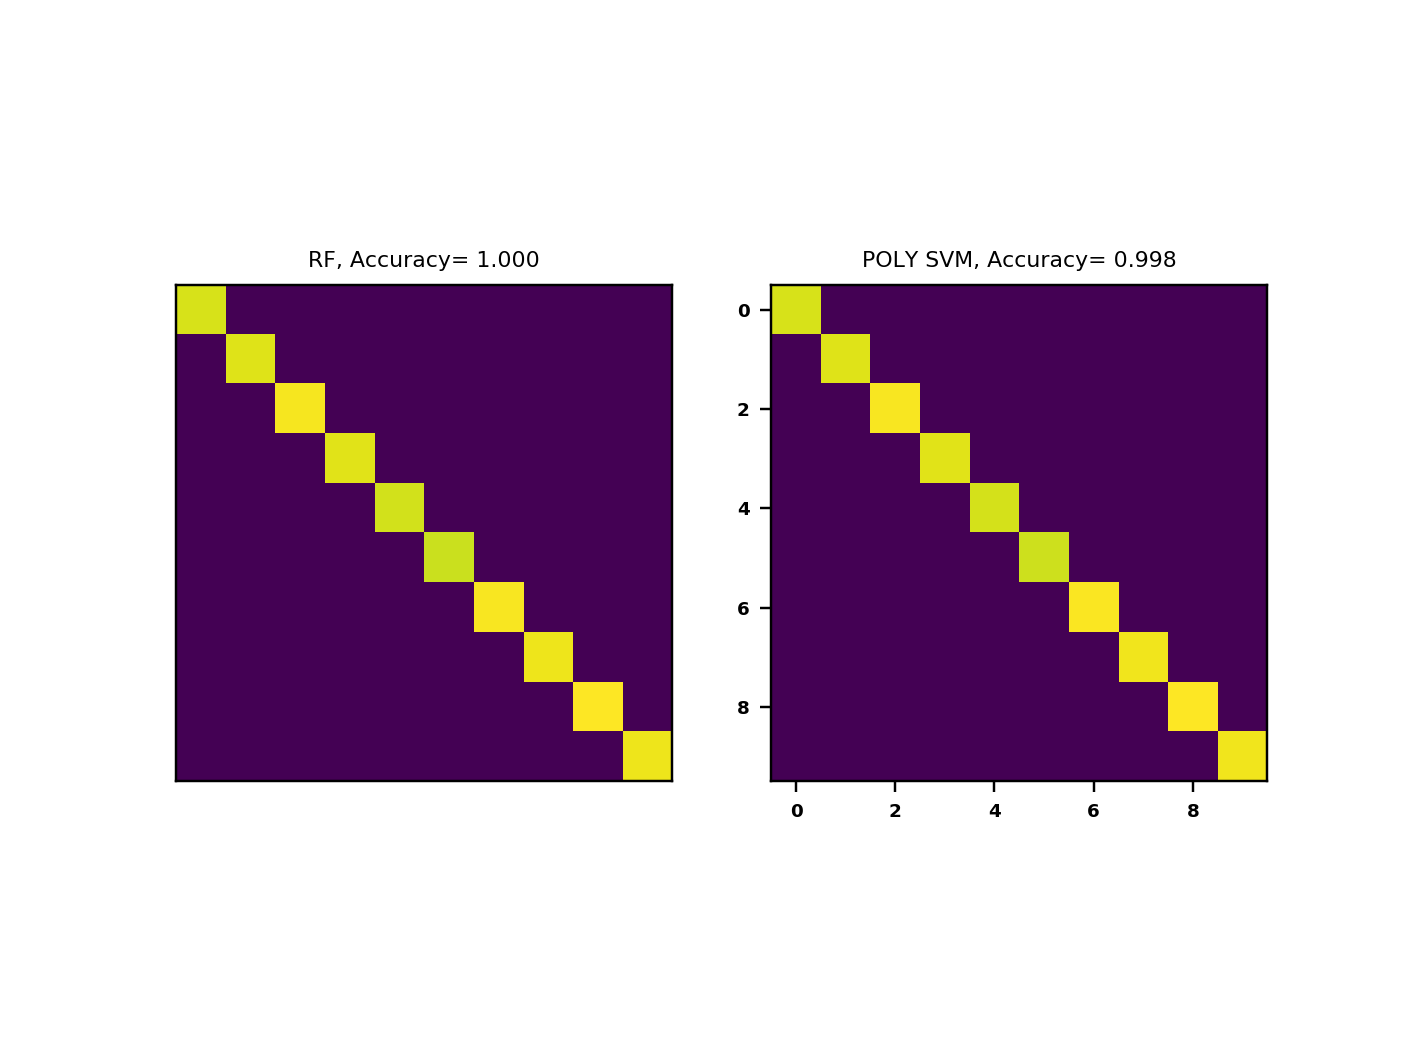

In [85]:
X_RFC=X_HOG1.copy()
Y_RFC=Y.copy()

# Split the data
X_train41, X_test41, Y_train41, Y_test41 = train_test_split( X_HOG1, Y, train_size=0.7)

#Training set performance
#----------------------------------------------------------
clf = RandomForestClassifier(n_estimators=500, criterion='entropy')
clf.fit(X_train41, Y_train41)
prediction41= clf.predict(X_train41)
conf41 = confusion_matrix( Y_train41, prediction41)
accuracyRFC = accuracy_score(Y_train41, prediction41)
#------------------------------------------------------
svm_classiferPOLY = svm.SVC( gamma='scale', kernel='poly')
# Fit, predict, and plot the confusion matrix
svm_classiferPOLY.fit(X_train41, Y_train41)
predictionPOLY = svm_classiferPOLY.predict( X_train41)
confPOLY = confusion_matrix( Y_train41, predictionPOLY)
accuracyPOLY = accuracy_score(Y_train41, predictionPOLY)
#--------------------------------------------------------


plt.figure()
plt.subplot(1,2,(1)), plt.imshow(conf41)
plt.title('RF, Accuracy= '+str("{0:.3f}".format(round(accuracyRFC,3)))), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,(2)), plt.imshow(confPOLY)
plt.title('POLY SVM, Accuracy= '+str("{0:.3f}".format(round(accuracyPOLY,3))))
plt.show()

<IPython.core.display.Javascript object>


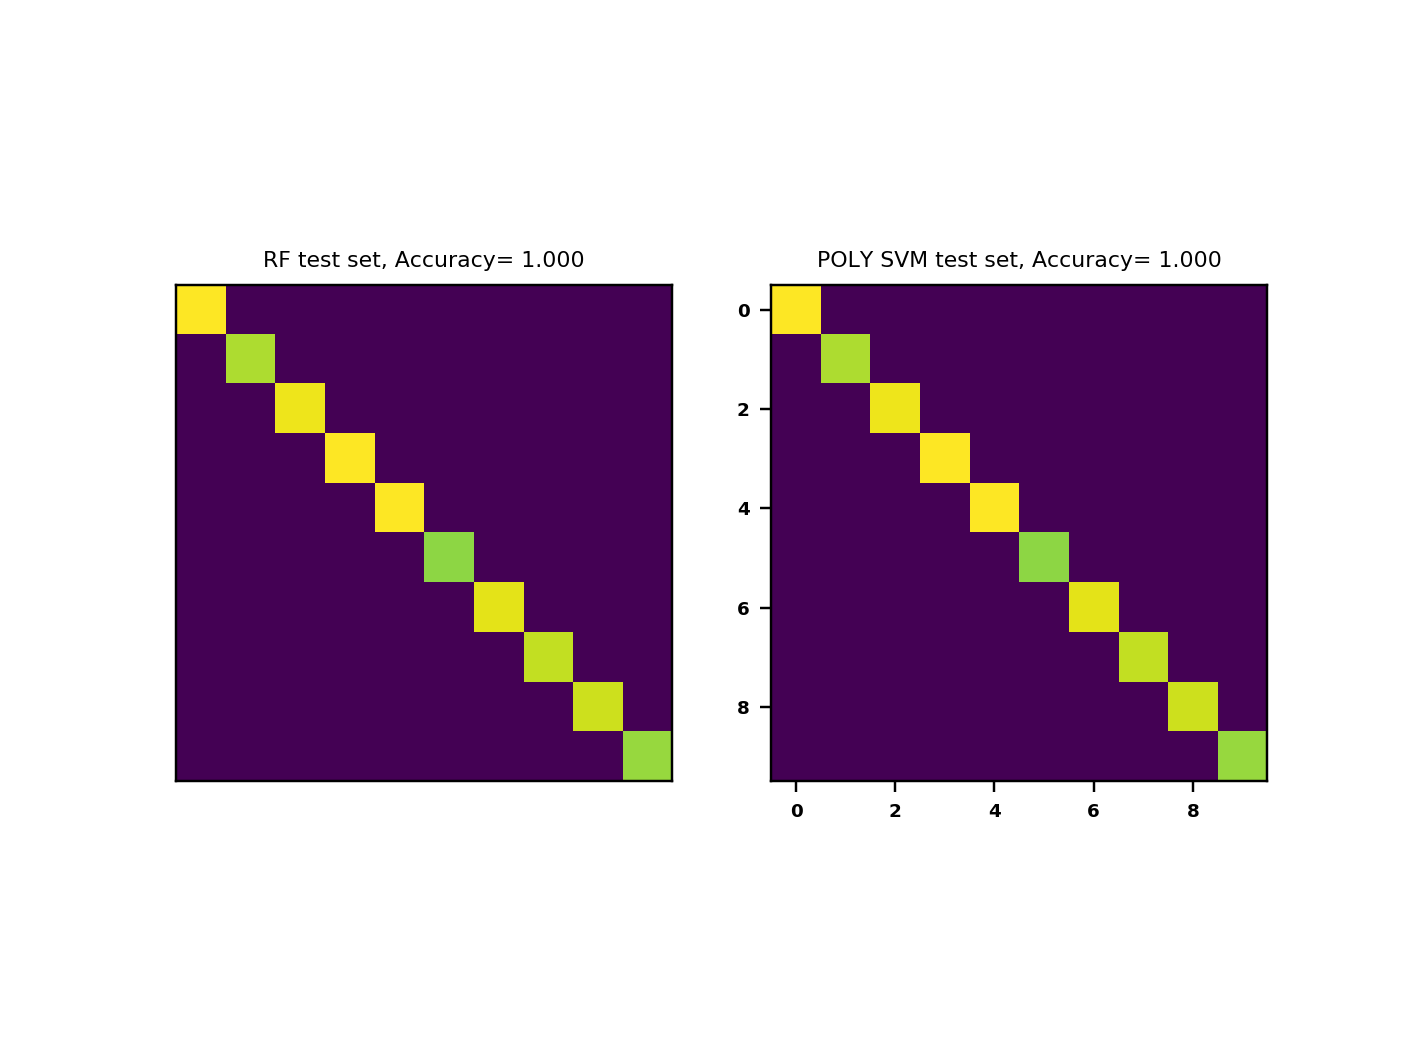

In [86]:

#Training set performance
#----------------------------------------------------------
clf = RandomForestClassifier(n_estimators=500, criterion='entropy')
clf.fit(X_test41, Y_test41)
prediction41= clf.predict(X_test41)
conf41 = confusion_matrix( Y_test41, prediction41)
accuracyRFC = accuracy_score(Y_test41, prediction41)
#------------------------------------------------------
svm_classiferPOLY = svm.SVC( gamma='scale', kernel='poly')
# Fit, predict, and plot the confusion matrix
svm_classiferPOLY.fit(X_test41, Y_test41)
predictionPOLY = svm_classiferPOLY.predict( X_test41)
confPOLY = confusion_matrix( Y_test41, predictionPOLY)
accuracyPOLY = accuracy_score(Y_test41, predictionPOLY)
#--------------------------------------------------------


plt.figure()
plt.subplot(1,2,(1)), plt.imshow(conf41)
plt.title('RF test set, Accuracy= '+str("{0:.3f}".format(round(accuracyRFC,3)))), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,(2)), plt.imshow(confPOLY)
plt.title('POLY SVM test set, Accuracy= '+str("{0:.3f}".format(round(accuracyPOLY,3))))
plt.show()

The accuracy, and hence performance, is pretty high, but telling from the confusion diagram. <br>
Automobile is more likely to be misclassified by RF, than in SVM. <br>
Frog is more likely misclassified by SVM, than in RF.

### 4.2 Exploring Different Parameters of HoG

In [120]:
#Import the Support Vector Machine classifier:
from sklearn import svm
from skimage import color
from skimage.feature import hog
# We'll be using the confusion matrix:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# classification dataset with 3 classes
dicti=unpickle("data_batch_1")

for key in dicti.keys():
    print (key)
    if key.decode("utf-8")==("data"):
        X=dicti[key]
    if key.decode("utf-8")==("labels"):
        Y=dicti[key]
#print(len(Y))
data = X.reshape(-1,3,32,32).transpose([0,2,3,1])
data_gray = [ color.rgb2gray(i) for i in data]
#HOG
ppc = 6
#hog_image2 = []
hog_features = []
for image in data_gray:
    fd,_ = hog(image, orientations=9, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2', visualize=True)
    #hog_image2.append(hog_image)
    hog_features.append(fd)
    
X_HOG1=np.array(hog_features)



b'batch_label'
b'labels'
b'data'
b'filenames'


In [121]:
# Split the data
X_trainNL, X_testNL, Y_trainNL, Y_testNL = train_test_split( X_HOG1, Y, train_size=0.7)
print(X_HOG1.shape)
print(X_trainNL.shape)
print(X_testNL.shape)

(10000, 576)
(7000, 576)
(3000, 576)


<IPython.core.display.Javascript object>


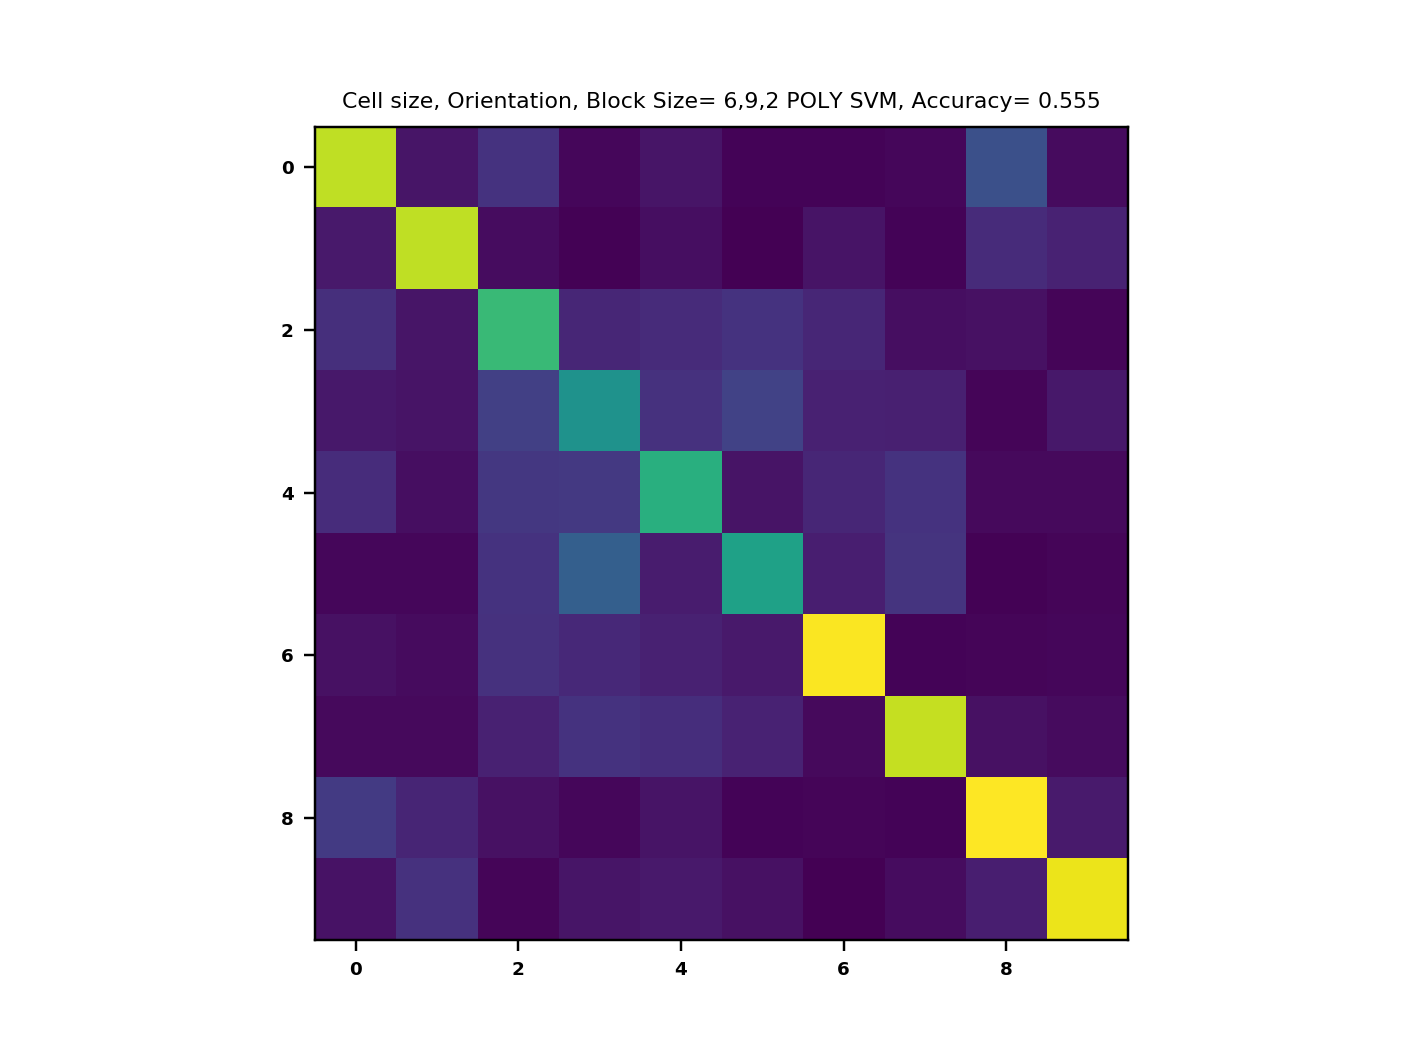

In [122]:
# We can change the kernel using the "kernel" parameter
# Different kernels are described in the documentation
# Use kernel='poly' for now
svm_classiferPOLY = svm.SVC( gamma='scale', kernel='poly')
# Fit, predict, and plot the confusion matrix
svm_classiferPOLY.fit(X_trainNL, Y_trainNL)
predictionPOLY = svm_classiferPOLY.predict( X_testNL)
confPOLY = confusion_matrix( Y_testNL, predictionPOLY)
accuracyPOLY = accuracy_score(Y_testNL, predictionPOLY)


plt.figure()
plt.subplot(1,1,(1)), plt.imshow(confPOLY)
plt.title('Cell size, Orientation, Block Size= '+str(ppc)+","+str(9)+","+str(2)+' POLY SVM, Accuracy= '+str("{0:.3f}".format(round(accuracyPOLY,3))))
plt.show()

In [62]:
#Import the Support Vector Machine classifier:
from sklearn import svm
from skimage import color
from skimage.feature import hog
# We'll be using the confusion matrix:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# classification dataset with 3 classes
dicti=unpickle("data_batch_1")

for key in dicti.keys():
    print (key)
    if key.decode("utf-8")==("data"):
        X=dicti[key]
    if key.decode("utf-8")==("labels"):
        Y=dicti[key]
#print(len(Y))
data = X.reshape(-1,3,32,32).transpose([0,2,3,1])
data_gray = [ color.rgb2gray(i) for i in data]
#HOG
ppc = 9
#hog_image2 = []
hog_features = []
for image in data_gray:
    fd,_ = hog(image, orientations=9, pixels_per_cell=(ppc,ppc),cells_per_block=(3, 3),block_norm= 'L2', visualize=True)
    #hog_image2.append(hog_image)
    hog_features.append(fd)
    
X_HOG1=np.array(hog_features)



b'batch_label'
b'labels'
b'data'
b'filenames'


In [63]:
# Split the data
X_trainNL, X_testNL, Y_trainNL, Y_testNL = train_test_split( X_HOG1, Y, train_size=0.7)
print(X_HOG1.shape)
print(X_trainNL.shape)
print(X_testNL.shape)

(10000, 81)
(7000, 81)
(3000, 81)


<IPython.core.display.Javascript object>


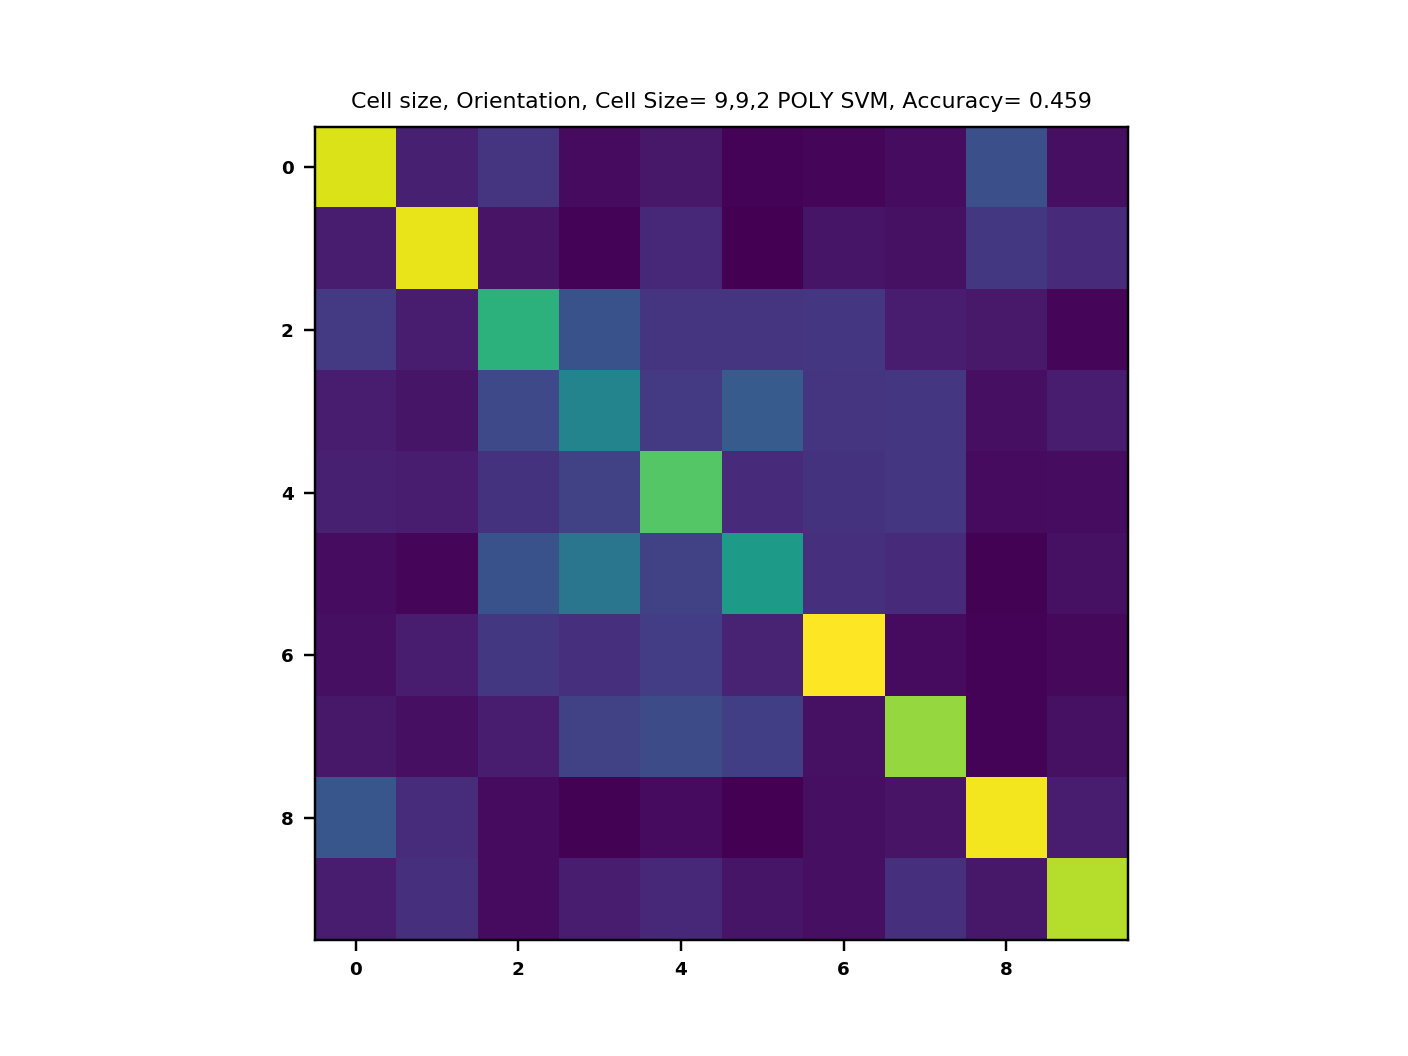

In [64]:
# We can change the kernel using the "kernel" parameter
# Different kernels are described in the documentation
# Use kernel='poly' for now
svm_classiferPOLY = svm.SVC( gamma='scale', kernel='poly')
# Fit, predict, and plot the confusion matrix
svm_classiferPOLY.fit(X_trainNL, Y_trainNL)
predictionPOLY = svm_classiferPOLY.predict( X_testNL)
confPOLY = confusion_matrix( Y_testNL, predictionPOLY)
accuracyPOLY = accuracy_score(Y_testNL, predictionPOLY)


plt.figure()
plt.subplot(1,1,(1)), plt.imshow(confPOLY)
plt.title('Cell size, Orientation, Block Size= '+str(ppc)+","+str(9)+","+str(3)+' POLY SVM, Accuracy= '+str("{0:.3f}".format(round(accuracyPOLY,3))))
plt.show()

In [65]:
#Import the Support Vector Machine classifier:
from sklearn import svm
from skimage import color
from skimage.feature import hog
# We'll be using the confusion matrix:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# classification dataset with 3 classes
dicti=unpickle("data_batch_1")

for key in dicti.keys():
    print (key)
    if key.decode("utf-8")==("data"):
        X=dicti[key]
    if key.decode("utf-8")==("labels"):
        Y=dicti[key]
#print(len(Y))
data = X.reshape(-1,3,32,32).transpose([0,2,3,1])
data_gray = [ color.rgb2gray(i) for i in data]
#HOG
ppc = 10
#hog_image2 = []
hog_features = []
for image in data_gray:
    fd,_ = hog(image, orientations=5, pixels_per_cell=(ppc,ppc),cells_per_block=(3, 3),block_norm= 'L2', visualize=True)
    #hog_image2.append(hog_image)
    hog_features.append(fd)
    
X_HOG1=np.array(hog_features)



b'batch_label'
b'labels'
b'data'
b'filenames'


In [66]:
# Split the data
X_trainNL, X_testNL, Y_trainNL, Y_testNL = train_test_split( X_HOG1, Y, train_size=0.7)
print(X_HOG1.shape)
print(X_trainNL.shape)
print(X_testNL.shape)

(10000, 45)
(7000, 45)
(3000, 45)


<IPython.core.display.Javascript object>


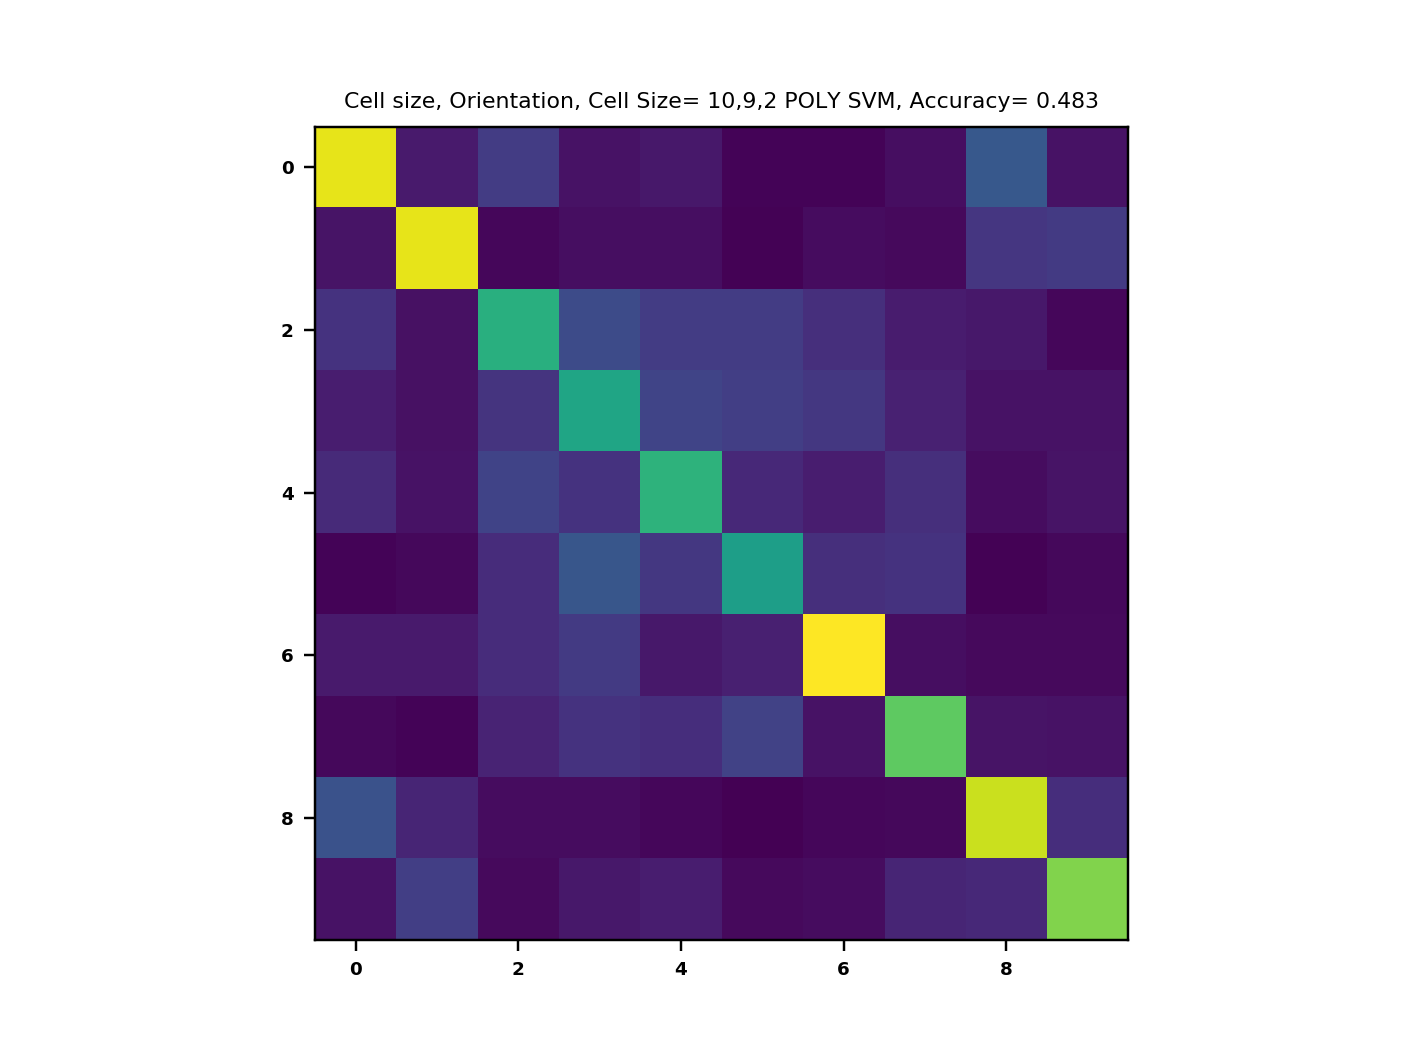

In [68]:
# We can change the kernel using the "kernel" parameter
# Different kernels are described in the documentation
# Use kernel='poly' for now
svm_classiferPOLY = svm.SVC( gamma='scale', kernel='poly')
# Fit, predict, and plot the confusion matrix
svm_classiferPOLY.fit(X_trainNL, Y_trainNL)
predictionPOLY = svm_classiferPOLY.predict( X_testNL)
confPOLY = confusion_matrix( Y_testNL, predictionPOLY)
accuracyPOLY = accuracy_score(Y_testNL, predictionPOLY)


plt.figure()
plt.subplot(1,1,(1)), plt.imshow(confPOLY)
plt.title('Cell size, Orientation, Block Size= '+str(ppc)+","+str(9)+","+str(3)+' POLY SVM, Accuracy= '+str("{0:.3f}".format(round(accuracyPOLY,3))))
plt.show()

Overall, the best performance is the SVM, with Cell Size, Orientation, Block Size of: 6,9,2. This has an accuracy of 0.555. The other results are shown in the plots above. <br> Note:Legend is: Cell Size, Orientation, Block Size

### 4.3 Folded Valuation

In [90]:
def HOG (data):
    data_gray1 = [ color.rgb2gray(i) for i in data]
    #HOG
    ppc = 6
    #hog_image2 = []
    hog_features = []
    for image in data_gray:
        fd,_ = hog(image, orientations=9, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2', visualize=True)
        hog_features.append(fd)
    X_HOG=np.array(hog_features)
    return X_HOG

In [94]:
#Import the Support Vector Machine classifier:
from sklearn import svm
from skimage import color
from skimage.feature import hog
# We'll be using the confusion matrix:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# classification dataset with 3 classes
dicti1=unpickle("data_batch_3")
dicti2=unpickle("data_batch_4")
dicti3=unpickle("data_batch_5")
dictiT=unpickle("test_batch")

for key in dicti.keys():
    print (key)
    if key.decode("utf-8")==("data"):
        X1=dicti1[key]
        X2=dicti2[key]
        X3=dicti3[key]
        XT=dictiT[key]
    if key.decode("utf-8")==("labels"):
        Y1=dicti1[key]
        Y2=dicti2[key]
        Y3=dicti3[key]
        YT=dictiT[key]
        
#print(len(Y))
data1 = X1.reshape(-1,3,32,32).transpose([0,2,3,1])
data2 = X2.reshape(-1,3,32,32).transpose([0,2,3,1])
data3 = X3.reshape(-1,3,32,32).transpose([0,2,3,1])
dataT = XT.reshape(-1,3,32,32).transpose([0,2,3,1])

X_HOG1=HOG(data1)
X_HOG2=HOG(data2)
X_HOG3=HOG(data3)
X_HOGT=HOG(dataT)

b'batch_label'
b'labels'
b'data'
b'filenames'


In [102]:
print (X_HOGT.shape)
print (dataT.shape)
print (XT.shape)
print (X_HOG1.shape)

(10000, 576)
(10000, 32, 32, 3)
(10000, 3072)
(10000, 576)


In [109]:
#Batch 3
svm_classiferPOLY1 = svm.SVC(gamma='scale', kernel='poly')
svm_classiferPOLY1.fit(X_HOG1, Y1)
predictionPOLY = svm_classiferPOLY1.predict( X_HOGT)
confPOLY = confusion_matrix( YT, predictionPOLY)
accuracyPOLY = accuracy_score(YT, predictionPOLY)





<IPython.core.display.Javascript object>


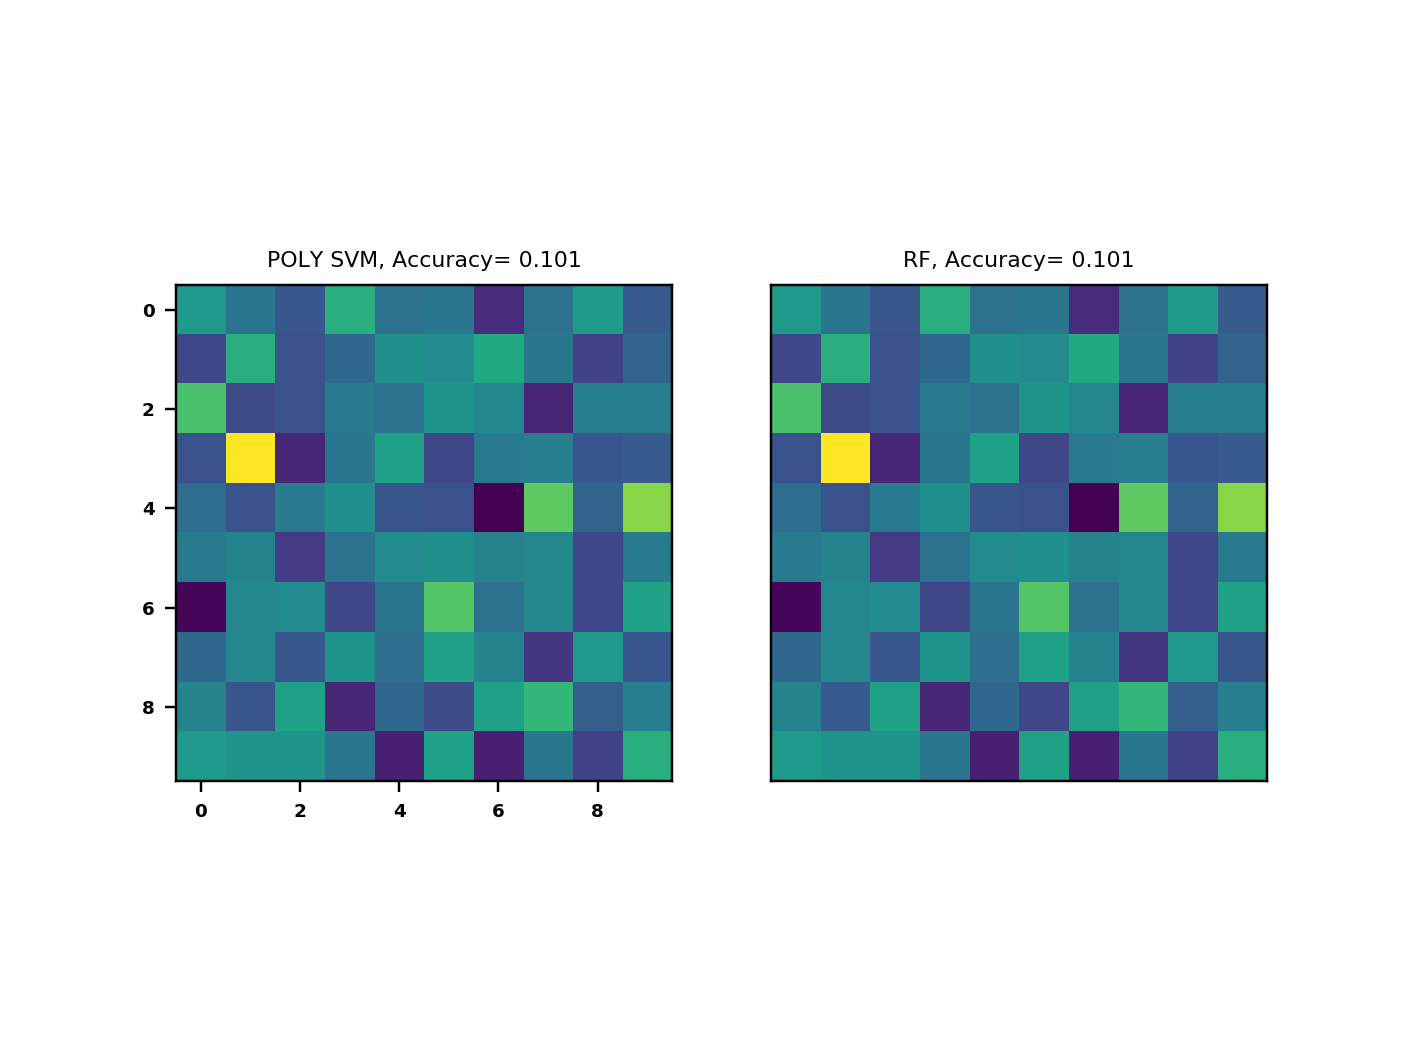

In [106]:
clf1 = RandomForestClassifier(n_estimators=500, criterion='entropy')
clf1.fit(X_HOG1, Y1)
predictionRFC= clf1.predict(X_HOGT)
confRFC = confusion_matrix( YT, predictionRFC)
accuracyRFC = accuracy_score(YT, predictionRFC)


plt.figure()
plt.subplot(1,2,(1)), plt.imshow(confPOLY)
plt.title('POLY SVM, Accuracy= '+str("{0:.3f}".format(round(accuracyPOLY,3))))
plt.subplot(1,2,(2)),plt.imshow(confRFC)
plt.title('RF, Accuracy= '+str("{0:.3f}".format(round(accuracyRFC,3)))), plt.xticks([]), plt.yticks([])
plt.show()

<IPython.core.display.Javascript object>


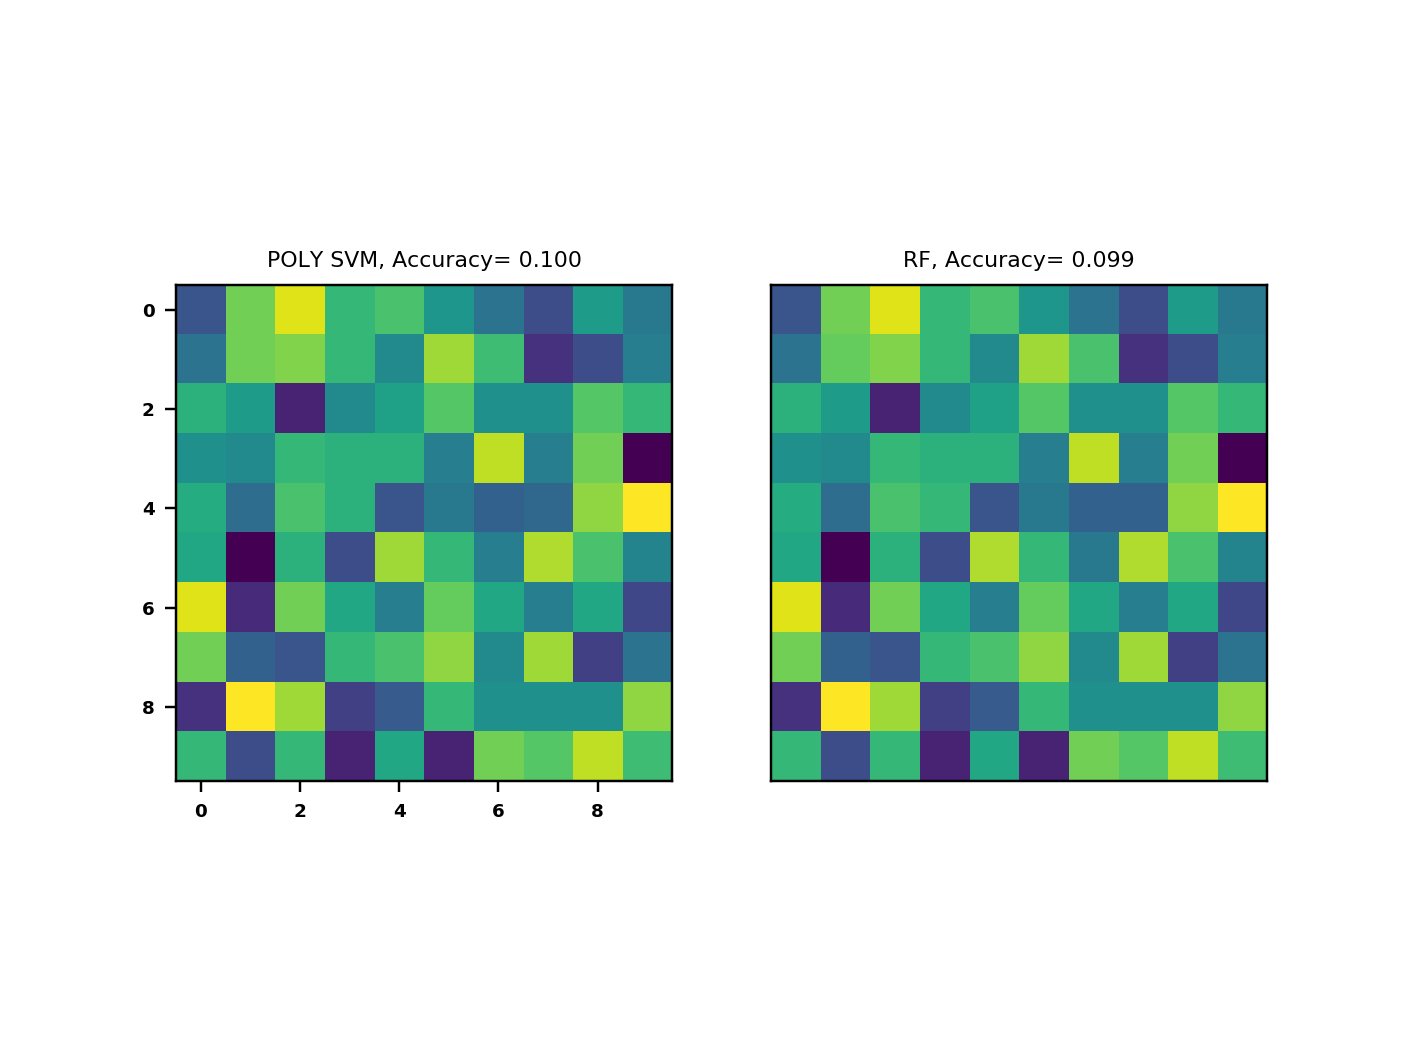

In [107]:
#Batch 4
svm_classiferPOLY2 = svm.SVC(gamma='scale', kernel='poly')
svm_classiferPOLY2.fit(X_HOG2, Y2)
predictionPOLY = svm_classiferPOLY2.predict( X_HOGT)
confPOLY = confusion_matrix( YT, predictionPOLY)
accuracyPOLY = accuracy_score(YT, predictionPOLY)




clf2 = RandomForestClassifier(n_estimators=500, criterion='entropy')
clf2.fit(X_HOG2, Y2)
predictionRFC= clf2.predict(X_HOGT)
confRFC = confusion_matrix( YT, predictionRFC)
accuracyRFC = accuracy_score(YT, predictionRFC)


plt.figure()
plt.subplot(1,2,(1)), plt.imshow(confPOLY)
plt.title('POLY SVM, Accuracy= '+str("{0:.3f}".format(round(accuracyPOLY,3))))
plt.subplot(1,2,(2)),plt.imshow(confRFC)
plt.title('RF, Accuracy= '+str("{0:.3f}".format(round(accuracyRFC,3)))), plt.xticks([]), plt.yticks([])
plt.show()

<IPython.core.display.Javascript object>


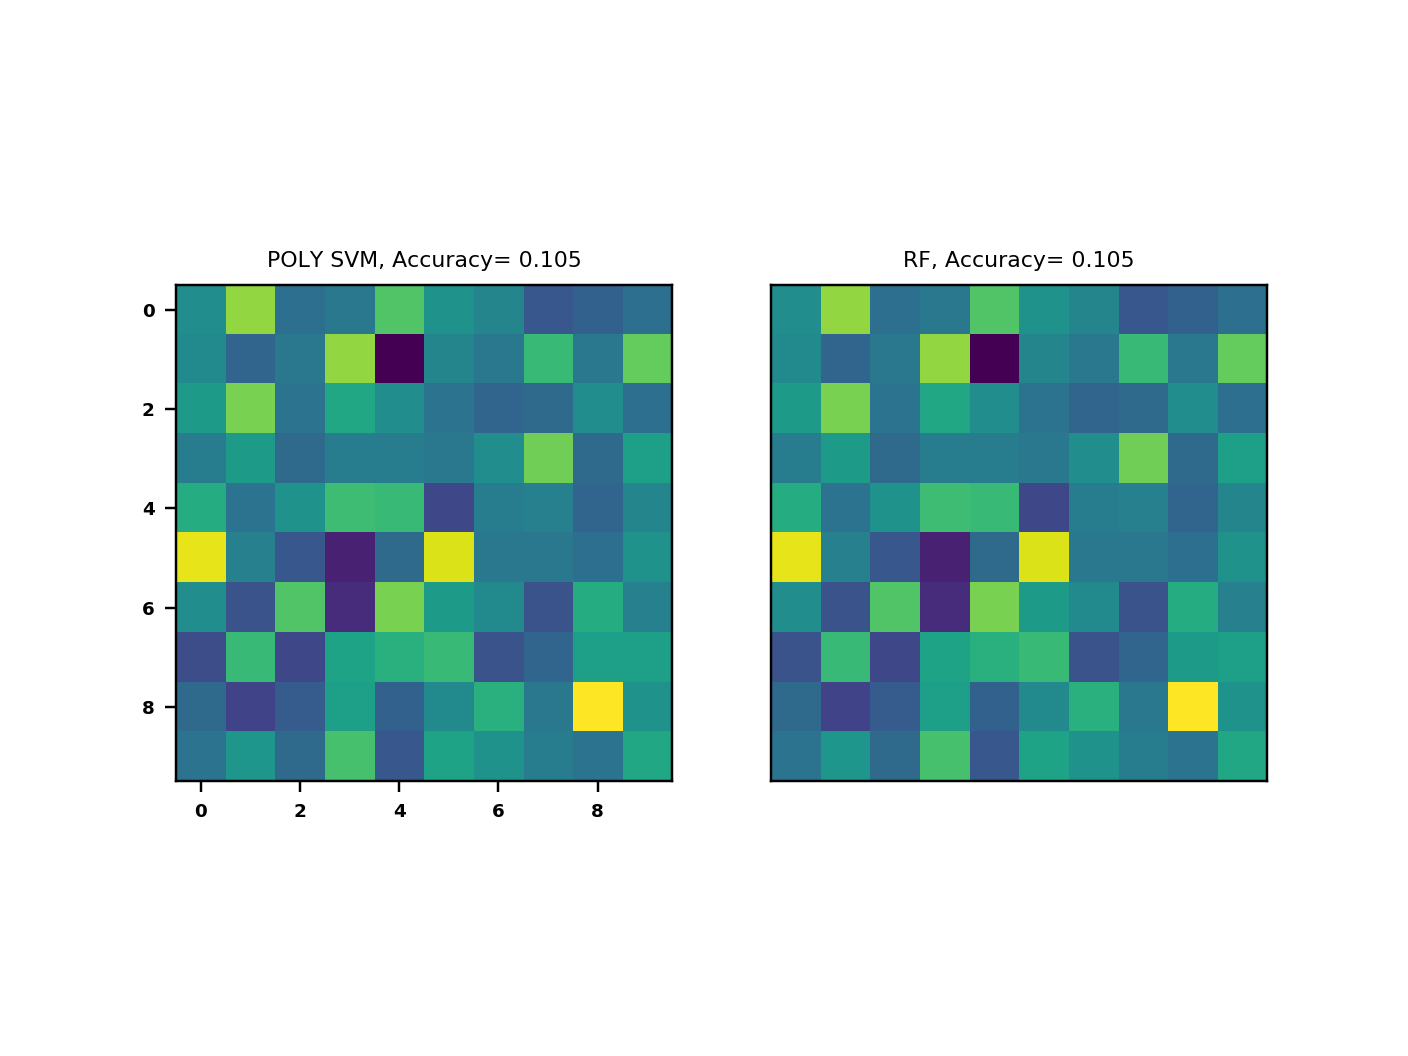

In [108]:
#Batch 5
svm_classiferPOLY3 = svm.SVC(gamma='scale', kernel='poly')
svm_classiferPOLY3.fit(X_HOG3, Y3)
predictionPOLY = svm_classiferPOLY3.predict( X_HOGT)
confPOLY = confusion_matrix( YT, predictionPOLY)
accuracyPOLY = accuracy_score(YT, predictionPOLY)




clf3 = RandomForestClassifier(n_estimators=500, criterion='entropy')
clf3.fit(X_HOG3, Y3)
predictionRFC= clf3.predict(X_HOGT)
confRFC = confusion_matrix( YT, predictionRFC)
accuracyRFC = accuracy_score(YT, predictionRFC)


plt.figure()
plt.subplot(1,2,(1)), plt.imshow(confPOLY)
plt.title('POLY SVM, Accuracy= '+str("{0:.3f}".format(round(accuracyPOLY,3))))
plt.subplot(1,2,(2)),plt.imshow(confRFC)
plt.title('RF, Accuracy= '+str("{0:.3f}".format(round(accuracyRFC,3)))), plt.xticks([]), plt.yticks([])
plt.show()

I see that the fold with data_batch5 is the best performing in both SVM and RF. This is probably because the data in the test_batch is most likely the most similar to data in data_batch5. Hence the classifiers are better trained in finding patterns in that fold.

### 4.4 Ensemble Classifier

In [112]:
#Import the Support Vector Machine classifier:
from sklearn import svm
from skimage import color
from skimage.feature import hog
# We'll be using the confusion matrix:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# classification dataset with 3 classes
dicti=unpickle("data_batch_1")

for key in dicti.keys():
    print (key)
    if key.decode("utf-8")==("data"):
        X=dicti[key]
    if key.decode("utf-8")==("labels"):
        Y=dicti[key]
#print(len(Y))
data = X.reshape(-1,3,32,32).transpose([0,2,3,1])
data_gray = [ color.rgb2gray(i) for i in data]
#HOG
ppc = 6
#hog_image2 = []
hog_features = []
for image in data_gray:
    fd,_ = hog(image, orientations=9, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2', visualize=True)
    #hog_image2.append(hog_image)
    hog_features.append(fd)
    
X_HOG1=np.array(hog_features)



b'batch_label'
b'labels'
b'data'
b'filenames'


In [113]:
# Split the data
X_trainNL, X_testNL, Y_trainNL, Y_testNL = train_test_split( X_HOG1, Y, train_size=0.7)
print(X_HOG1.shape)
print(X_trainNL.shape)
print(X_testNL.shape)

(10000, 576)
(7000, 576)
(3000, 576)


<IPython.core.display.Javascript object>


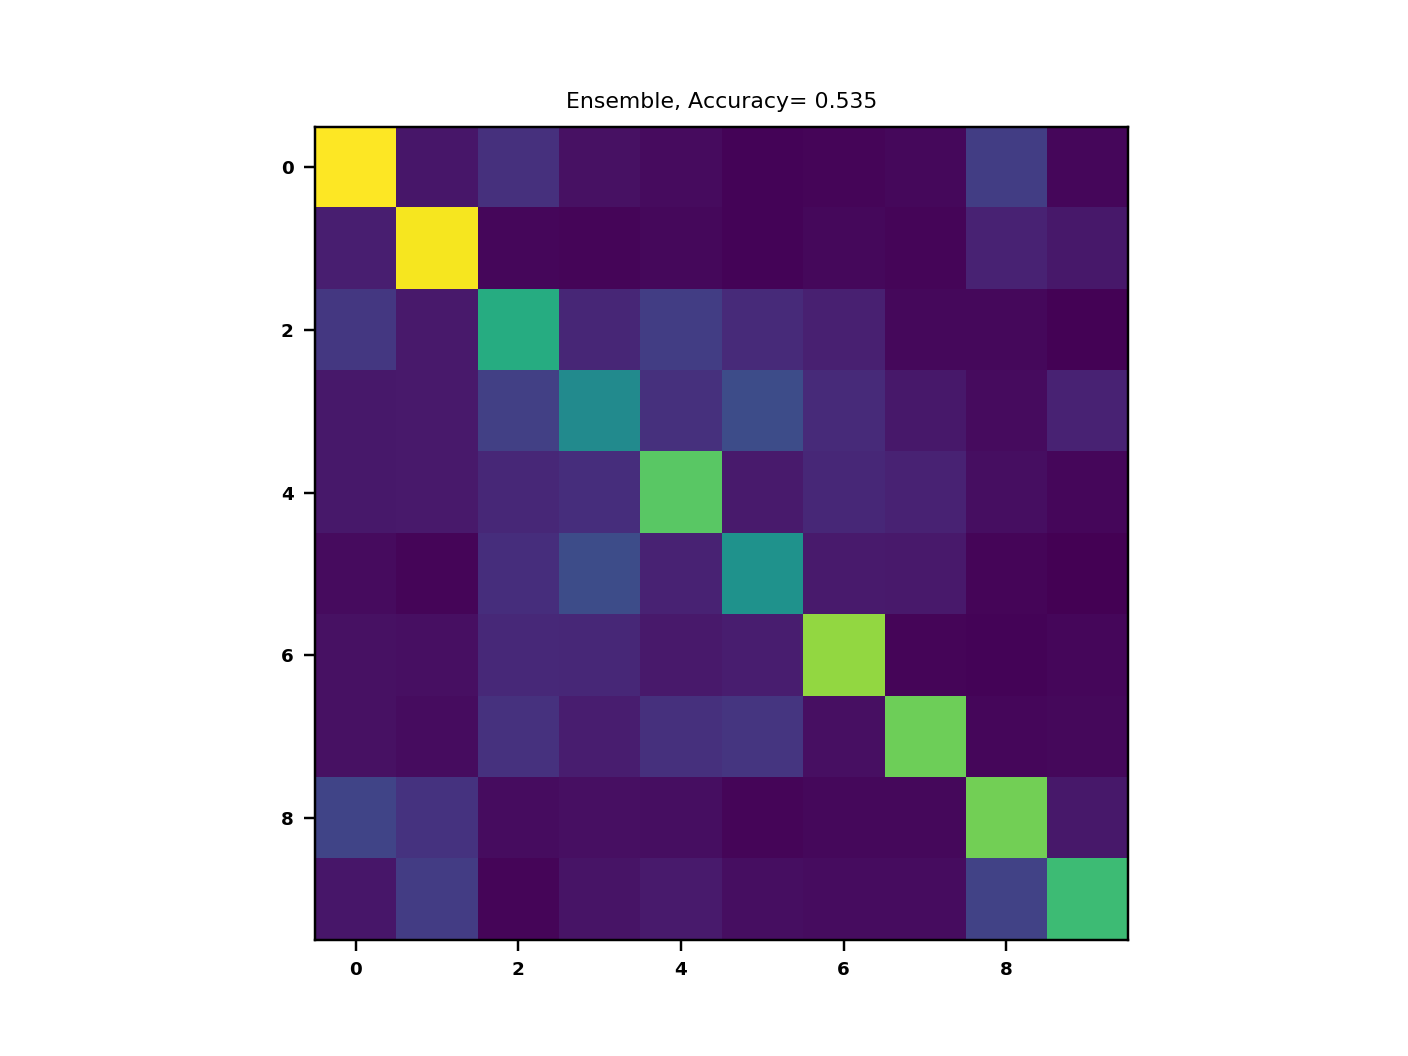

Text(0.5, 1.0, 'Ensemble, Accuracy= 0.535')

In [119]:
from sklearn.ensemble import VotingClassifier

#Voting dictionary, inspired by: towardsdatascience
estimators=[('SVM1', svm_classiferPOLY1), ('SVM2', svm_classiferPOLY2), ('SVM3', svm_classiferPOLY3),
           ('RF1', clf1),('RF2', clf2),('RF3', clf3)]


ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_trainNL, Y_trainNL)
enprediction= ensemble.predict(X_testNL)
enconf = confusion_matrix( Y_testNL, enprediction)
enaccuracy = accuracy_score(Y_testNL, enprediction)


plt.figure()
plt.subplot(1,1,(1)), plt.imshow(enconf)
plt.title('Ensemble, Accuracy= '+str("{0:.3f}".format(round(enaccuracy,3))))



Overall the Polynomial SVM performed better, however I did expect the ensemble to perform better. I believe that the ensemble should perform better since it uses voting from 6 different classifiers.<br> However the polynomial SVM did perform better by a slight margin on the same data. Maybe because the Polynomial SVM is more focused and suited to the specific data set in this case. <br>
However generally I believe the ensemble is more suitable, since it performs better over a variety of data sets. While this exact polynomial SVM will underperform on say data_batch 3, since it has not had the training on it.